# GDP Prediction Project

The used features is

- Gross Domestic Product (Quarterly GDP) 1947 - 2024
- Import Goods and Services (Quarterly Import) 1947 - 2024
- Gross Private Domestic Investment (Quarterly Investment) 1947 - 2024
- Personal Consumption Expenditure (Quarterly Consumption) 1947 to 2024
- Personal Consumption Expenditures: energy goods and services (monthly) 1959-01-01 to 2024-10-01
- Export Goods and Services (Quarterly Export) 1947 to 2024
---
- Industrial Production: Manufacturing (Quarterly Index) 1972 to 2024-10-01
- Industrial Production: Utilites: Electric and Gas Utilites (Quarterly Index) 1947-01-01 to 2024-10-01
- Producer Price Index by Industry: Industrial Gas Manufacturing (Quarterly index) 2004-01-01 to 2024-10-01
- Industrial Production: Manufacturing: Nondurable Goods: Chemical (Quarterly Index) 1972-01-01 to 2024-10-01
- Industrial Production: Manufacturing: Nondurable Goods: Food, Beverage, and Tobacco (Quarterly Index) 1972-01-01 to 2024-10-01

Source:

- Board of Governors of the Federal Reserve System (US), Industrial Production: Consumer Goods [IPCONGD], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPCONGD, March 13, 2025.

- U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, March 13, 2025.

-

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
import sklearn
sns.set_style('whitegrid')
#drive.mount('/content/drive')
#from google.colab import files
#from google.colab import drive
warnings.filterwarnings('ignore')

In [10]:
# version check
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
import matplotlib as mpl
print('matplotlib version: ', mpl.__version__)
import sys
print('Python version: ', sys.version)
print('sklearn version: ', sklearn.__version__)

pandas version:  2.2.2
numpy version:  2.0.2
seaborn version:  0.13.2
matplotlib version:  3.10.0
Python version:  3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
sklearn version:  1.6.1


# Import Dataset

In [ ]:
# from 1947 to 1958
data_47_58 = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_47_58.csv')
data_47_58['date'] = pd.to_datetime(data_47_58['date'])

# from 1959 to 1971
data_59_71 = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_59_71.csv')
data_59_71['date'] = pd.to_datetime(data_59_71['date'])

# from 1972 to 2003
data_72_03 = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_72_03.csv')
data_72_03['date'] = pd.to_datetime(data_72_03['date'])

# from 2004 to 2024
data_04_24 = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_04_24.csv')
data_04_24['date'] = pd.to_datetime(data_04_24['date'])

# NOTE: from 1947 to 2024
data_47_24 = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_47_24.csv')
data_47_24['date'] = pd.to_datetime(data_47_24['date'])

# delete unnamed: 0
data_47_58 = data_47_58.drop('Unnamed: 0', axis=1)
data_59_71 = data_59_71.drop('Unnamed: 0', axis=1)
data_72_03 = data_72_03.drop('Unnamed: 0', axis=1)
data_04_24 = data_04_24.drop('Unnamed: 0', axis=1)
data_47_24 = data_47_24.drop('Unnamed: 0', axis=1)

# Exploratory Data Analysis

## GDP Line Plot

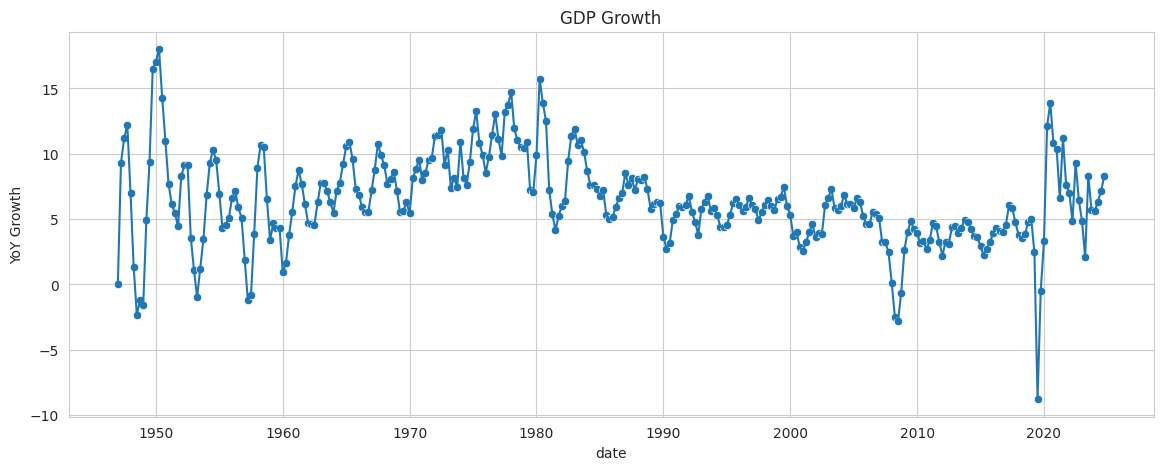

In [ ]:
# plot GDP

fig = plt.figure(figsize = (14,5))
sns.lineplot(data = data_47_24, x = 'date', y = 'yoy_gdp')
sns.scatterplot(data = data_47_24, x = 'date', y = 'yoy_gdp')
plt.title('GDP Growth')
plt.ylabel('YoY Growth')
#plt.savefig('gdp growth.png', dpi = 300, bbox_inches='tight')
#files.download('gdp growth.png')
plt.show()

## Correlation Value

### Data 1947 - 1958

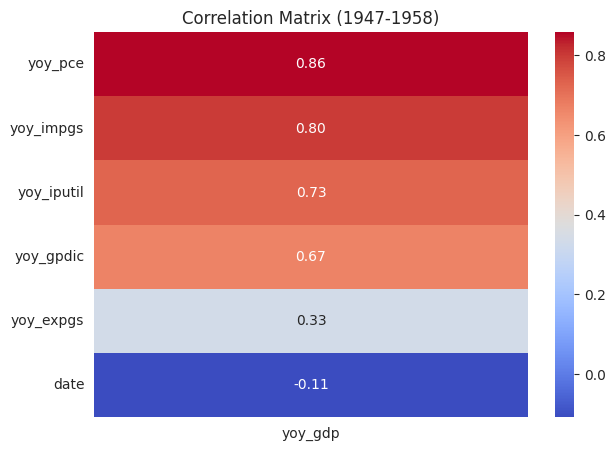

In [ ]:
# correlation function of data 1947 1958
correlation_matrix_47_58 = data_47_58.corr()

# Display correlation with 'yoy_gdp'
correlation_matrix_47_58 = correlation_matrix_47_58.sort_values(by = ['yoy_gdp'], ascending = False)
correlation_matrix_47_58 = correlation_matrix_47_58[['yoy_gdp']]
correlation_matrix_47_58.drop('yoy_gdp', axis = 0, inplace = True)

# visualize correlation matrix as a bar plot
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix_47_58.sort_values(by = ['yoy_gdp'], ascending = False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (1947-1958)')
#plt.savefig('correlation matrix 1947 1958.png', dpi = 300, bbox_inches='tight')
#files.download('correlation matrix 1947 1958.png')
plt.show()

### Data 1959 - 1971

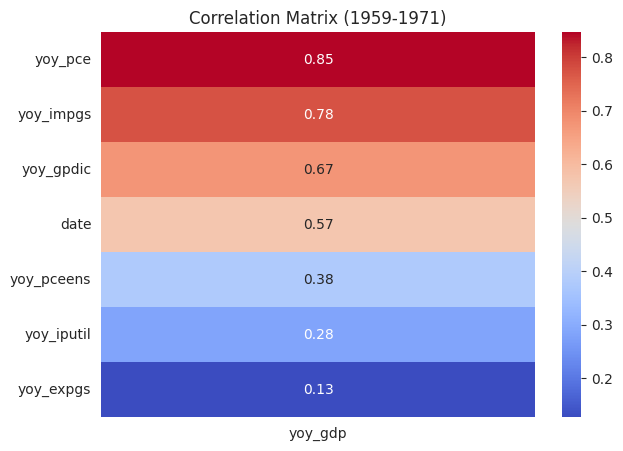

In [ ]:
# pearson correlation 1959 1971
corr_mat_59_71 = data_59_71.corr()

sorted_mat_59_71 = corr_mat_59_71.sort_values(by = ['yoy_gdp'], ascending = False)
sorted_mat_59_71 = sorted_mat_59_71[['yoy_gdp']]
sorted_mat_59_71.drop('yoy_gdp', axis = 0, inplace = True)

# visualize
plt.figure(figsize=(7, 5))
sns.heatmap(sorted_mat_59_71.sort_values(by = ['yoy_gdp'], ascending = False), annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (1959-1971)')
#plt.savefig('correlation matrix 1959 1971.png', dpi = 300, bbox_inches='tight')
#files.download('correlation matrix 1959 1971.png')
plt.show()

### Data 1972 - 2003

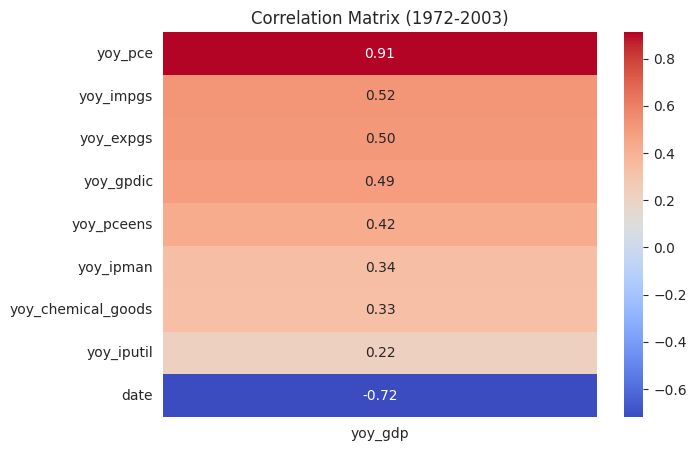

In [ ]:
# pearson correlation 1972 2003
corr_mat_72_03 = data_72_03.corr()

sorted_mat_72_03 = corr_mat_72_03.sort_values(by = ['yoy_gdp'], ascending = False)
sorted_mat_72_03 = sorted_mat_72_03[['yoy_gdp']]
sorted_mat_72_03.drop('yoy_gdp', axis = 0, inplace = True)

# visualize
plt.figure(figsize=(7, 5))
sns.heatmap(sorted_mat_72_03.sort_values(by = ['yoy_gdp'], ascending = False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (1972-2003)')
#plt.savefig('correlation matrix 1972 2003.png', dpi = 300, bbox_inches='tight')
#files.download('correlation matrix 1972 2003.png')
plt.show()

### Data 2004-2024

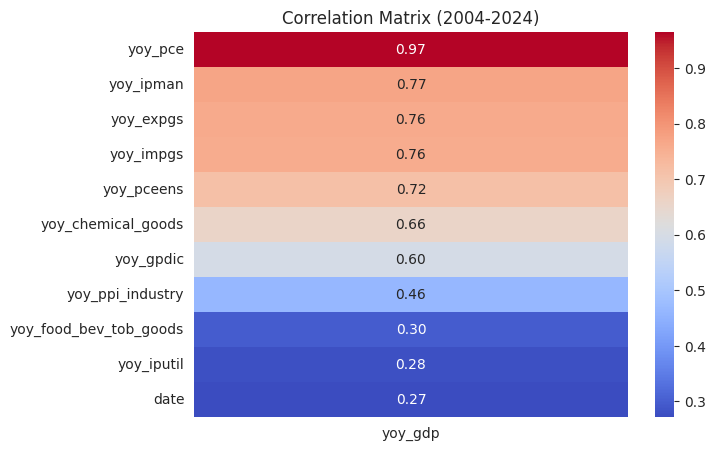

In [ ]:
# pearson correlation of data 2004 2024
corr_mat_04_24 = data_04_24.corr()

corr_mat_04_24 = corr_mat_04_24.sort_values(by = ['yoy_gdp'], ascending = False)
corr_mat_04_24 = corr_mat_04_24[['yoy_gdp']]
corr_mat_04_24.drop('yoy_gdp', axis = 0, inplace = True)

# visualize
plt.figure(figsize=(7, 5))
sns.heatmap(corr_mat_04_24.sort_values(by = ['yoy_gdp'], ascending = False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (2004-2024)')
#plt.savefig('correlation matrix 2004 2024.png', dpi = 300, bbox_inches='tight')
#files.download('correlation matrix 2004 2024.png')
plt.show()

# Prediction Model

## Econometric Model

### Autoregression Model (AR)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


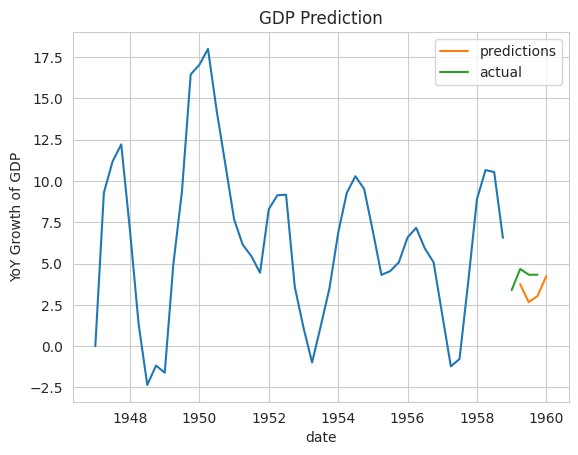

In [ ]:
# Using AR model to predict gdp
from statsmodels.tsa.ar_model import AutoReg
data = data_47_58[['date', 'yoy_gdp']]
data.set_index('date', inplace = True)

# create and fit Autoreg Model
model = AutoReg(data, lags = 2, old_names=False)
model_fit = model.fit()

# PREDICTION
predictions = model_fit.predict(start = len(data), end = len(data) + 3) # predict next 4 periods

# create a DataFrame from prediction
predictions_df = pd.DataFrame({'date':pd.date_range(start = data.index[-1], periods = 5, freq = 'Q')[1:], 'predicted_gdp':predictions})

# convert date column
predictions_df['date'] = pd.to_datetime(predictions_df['date'])

#plot the prediction
sns.lineplot(data = data, x = 'date', y = 'yoy_gdp')
sns.lineplot(data = predictions_df, x = 'date', y = 'predicted_gdp', label = 'predictions')
sns.lineplot(data = data_59_71[:len(predictions_df)], x = 'date', y = 'yoy_gdp', label = 'actual')
plt.title('GDP Prediction')
plt.ylabel('YoY Growth of GDP')
plt.show()

In [ ]:
# create an RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(data_59_71[:len(predictions_df)]['yoy_gdp'], predictions_df['predicted_gdp']))
print(rmse)

1.209354785777159


### Factor Model

In [ ]:
# factor model
import statsmodels.api as sm
from statsmodels.multivariate.factor import Factor

# assuming 'data' is your DataFrame with relevant variables
feat = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
data_subset = data_47_58[feat]

# create and fit the factor analysis model
fac_modl = Factor(data_subset, n_factor = 2, method = 'pa')
result = fac_modl.fit()

# get factor loading
factor_loading = result.loadings
factors = result.factor_scoring(method='regression')
factors[0]

array([-1.42532211, -0.0083705 ])

### Autoregression + Factor Model + Squared Error

<Axes: title={'center': 'RMSE vs Lags'}, xlabel='Lag', ylabel='Root Mean Squared Error'>

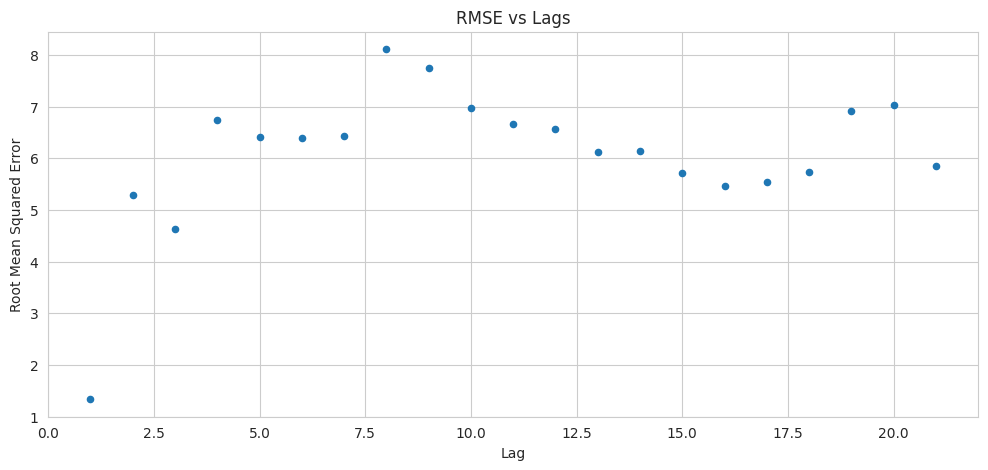

In [ ]:
# create rmse vs lag graph
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

def rmse(data, target, predict):
  return np.sqrt(mean_squared_error(data[:len(predict)][target], predict))

# Assuming you have data_47_58, data_59_71, factors, yoy_gdp defined

rmse_list = []
yoy_gdp = data_47_58['yoy_gdp']
lags = list(range(1,22))
for lag in lags:  # Test lags from 1 to 12
    # 1. Extract Factors and Target Variable
    factor1 = factors[:, 0]
    factor2 = factors[:, 1]
    fact1_ser = pd.Series(factor1)
    fact2_ser = pd.Series(factor2)
    fact1_ser.name = 'factor1'
    fact2_ser.name = 'factor2'

    # 2. Create lagged variables
    factor1_lag = fact1_ser.shift(1).dropna().values
    factor2_lag = fact2_ser.shift(1).dropna().values
    yoy_gdp_lag = yoy_gdp.shift(1).dropna().values

    # 3. Combine lagged-feature variables and lagged-target variables
    X = np.column_stack((factor1_lag, factor2_lag, yoy_gdp_lag))
    y = yoy_gdp[1:]

    # 4. Fit the AR model
    model = AutoReg(y, lags=lag, old_names=False, exog=X)
    model_fit = model.fit()

    # 5. Prediction
    exog_oos = np.tile(X[-1], (5, 1))
    # Fill potential NaNs in exog_oos with the mean of the respective column
    for i in range(exog_oos.shape[1]):
        exog_oos[:, i] = np.nan_to_num(exog_oos[:, i], np.nanmean(exog_oos[:, i]))

    pred = model_fit.predict(start=len(y), end=len(y) + 4, exog_oos=exog_oos)
    pred.drop(pred.index[-1], inplace=True)

    # 6. Calculate RMSE and append to the list
    rmse_val = rmse(data_59_71, 'yoy_gdp', pred)
    rmse_list.append(rmse_val)

# Print the RMSE list
rmse_df = pd.DataFrame({'Lag':lags, 'rmse':rmse_list})
rmse_df.plot(kind = 'scatter', x = 'Lag', y = 'rmse', title = 'RMSE vs Lags', figsize = (12,5), ylabel="Root Mean Squared Error", xlabel="Lag")
#plt.savefig('rmse based on lags.png', dpi = 300, bbox_inches='tight')
#files.download('rmse based on lags.png')

# You can further process the rmse_list to find the optimal lag

<Axes: title={'center': 'RMSE vs Exog Variables'}, xlabel='Exog Variables', ylabel='Root Mean Squared Error'>

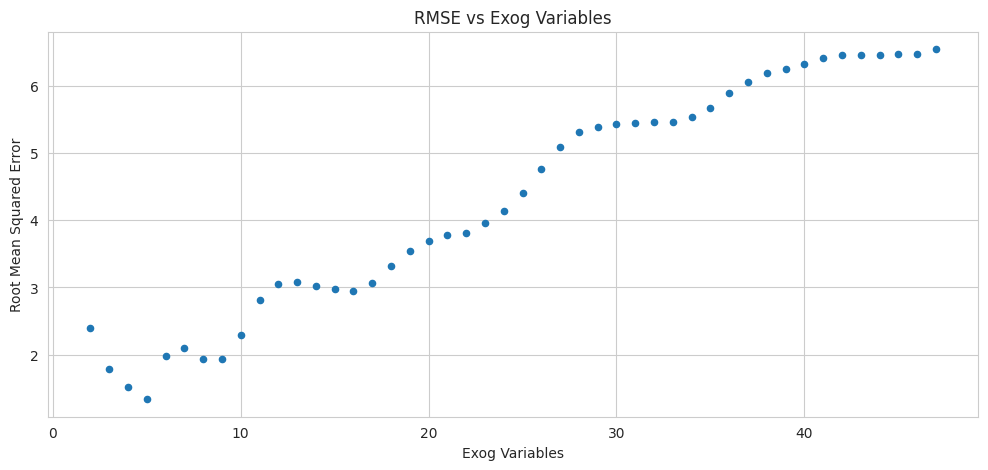

In [ ]:
# create rmse vs lag graph
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

def rmse(data, target, predict):
  return np.sqrt(mean_squared_error(data[:len(predict)][target], predict))

# Assuming you have data_47_58, data_59_03, factors, yoy_gdp defined

rmse_list = []
yoy_gdp = data_47_58['yoy_gdp']
lags = 1
exog_var = list(range(2,len(yoy_gdp)))
for var in exog_var:  # Test lags from 1 to 12
    # 1. Extract Factors and Target Variable
    factor1 = factors[:, 0]
    factor2 = factors[:, 1]
    fact1_ser = pd.Series(factor1)
    fact2_ser = pd.Series(factor2)
    fact1_ser.name = 'factor1'
    fact2_ser.name = 'factor2'

    # 2. Create lagged variables
    factor1_lag = fact1_ser.shift(1).dropna().values
    factor2_lag = fact2_ser.shift(1).dropna().values
    yoy_gdp_lag = yoy_gdp.shift(1).dropna().values

    # 3. Combine lagged-feature variables and lagged-target variables
    X = np.column_stack((factor1_lag, factor2_lag, yoy_gdp_lag))
    y = yoy_gdp[1:]

    # 4. Fit the AR model
    model = AutoReg(y, lags=1, old_names=False, exog=X)
    model_fit = model.fit()

    # 5. Prediction
    exog_oos = np.tile(X[-1], (var, 1))
    # Fill potential NaNs in exog_oos with the mean of the respective column
    for i in range(exog_oos.shape[1]):
        exog_oos[:, i] = np.nan_to_num(exog_oos[:, i], np.nanmean(exog_oos[:, i]))

    pred = model_fit.predict(start=len(y), end=len(y)+var-1, exog_oos=exog_oos)
    pred.drop(pred.index[-1], inplace=True)

    # 6. Calculate RMSE and append to the list
    rmse_val = rmse(data_59_71, 'yoy_gdp', pred)
    rmse_list.append(rmse_val)

# Print the RMSE list
rmse_df = pd.DataFrame({'variables':exog_var, 'rmse':rmse_list})
rmse_df.plot(kind = 'scatter', x = 'variables', y = 'rmse', title = 'RMSE vs Exog Variables', ylabel="Root Mean Squared Error", xlabel="Exog Variables", figsize = (12,5))
#plt.savefig('rmse based on exog variables.png', dpi = 300)
#files.download('rmse based on exog variables.png')

# You can further process the rmse_list to find the optimal lag

In [ ]:
# create a function of AR-FM-SE model
def ar_fm_se (data_train, data_target, feats, target, lag, exog_val):
  # assuming 'data' is your DataFrame with relevant variables
  data_subset = data_train[feats]

  # create and fit the factor analysis model
  fac_modl = Factor(data_subset, n_factor = 2, method = 'pa')
  result = fac_modl.fit()
  # get factor loading
  factor_loading = result.loadings
  factors = result.factor_scoring(method='regression')

  # Extract Factor and Target Variable
  factor1 = factors[:, 0]
  factor2 = factors[:, 1]
  fact1_ser = pd.Series(factor1)
  fact2_ser = pd.Series(factor2)
  fact1_ser.name = 'factor1'
  fact2_ser.name = 'factor2'

  # Add Target in Data Train
  yoy_target = data_train[target]

  # create lagged variable
  factor1_lag = fact1_ser.shift(1).dropna().values
  factor2_lag = fact2_ser.shift(1).dropna().values
  data_yoy_lag = yoy_target.shift(1).dropna().values

  # Combine lagged-feature variables and lagged-target variables
  X = np.column_stack((factor1_lag, factor2_lag, data_yoy_lag))
  y = yoy_target[1:]

  # Fit AR model
  model = AutoReg(y, lags=lag, old_names=False, exog=X)
  model_fit = model.fit()

  # predict
  exog_oos = np.tile(X[-1], (exog_val, 1))
  # Fill potential NaNs in exog_oos with the mean of the respective column
  for i in range(exog_oos.shape[1]):
    exog_oos[:, i] = np.nan_to_num(exog_oos[:, i], np.nanmean(exog_oos[:, i]))

  pred = model_fit.predict(start = len(y), end = len(y) + exog_val - 1, exog_oos = exog_oos)
  pred.drop(pred.index[-1], inplace = True)

  # Calculate RMSE
  rmse_val = rmse(data_target, target, pred)
  real_data = data_test[['date', target]]
  real_data.set_index('date', inplace = True)

  # Convert the pred result to DataFrame
  pred_df = pd.DataFrame({'gdp_pred':pred, 'time':real_data.index[:len(pred)]})

  # Plot data
  return rmse_val, exog_oos, pred_df

In [ ]:
# Create Visualization Function
def arfmse_visual(data_train, data_test, data_pred):
  plt.figure(figsize = (12,3))
  sns.lineplot(data = data_train, x = 'date', y = 'yoy_gdp', label = 'Latest Data')
  sns.lineplot(data = data_test.iloc[:len(data_pred)], x = 'date', y = 'yoy_gdp', label = 'Actual')
  sns.lineplot(data = data_pred, x = 'time', y = 'gdp_pred', label = 'Prediction')
  plt.legend()
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (AR-FM-SE Model)')
  return plt.show()

#### 1. Train 1947 - 1958 | Predict 1959-1971 | AR FM SE Model

In [ ]:
# Prediction based on 1947 - 1958 features
feat_47_58 = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
lags =3
val = 6
target = 'yoy_gdp'
data_train = data_47_58
data_test = data_59_71
rmse_score1, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_58, target = target, lag = lags, exog_val=val)
print(rmse_score1)

5.621819409021661


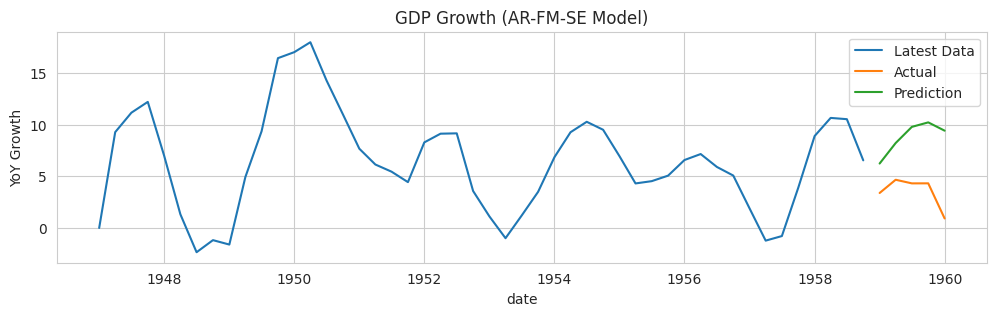

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

#### 2. Train 1947 - 1958 | Predict 1972 - 2003 | AR FM SE Model

In [ ]:
# Prediction based on 1947 - 1958 features
feat_47_58 = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_47_58
data_test = data_72_03
rmse_score2, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_58, target = target, lag = lags, exog_val=val)
print(rmse_score2)

2.9336485880481735


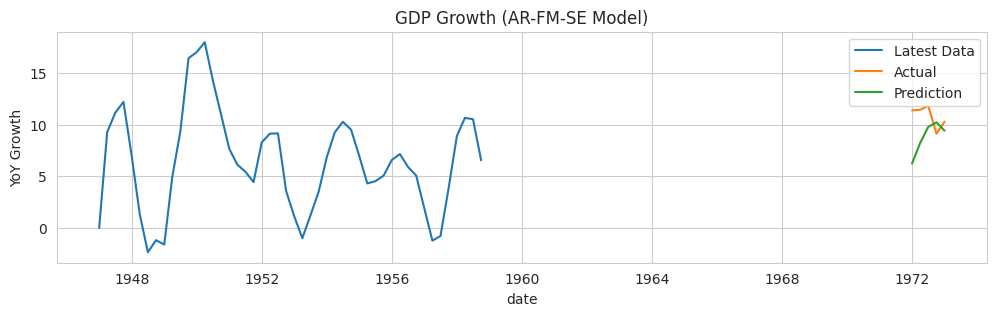

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

#### 3. Train 1947 - 1958 | Predict 2004 - 2024 | AR FM SE Model

In [ ]:
# Prediction based on 1947 - 1958 features
feat_47_58 = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_47_58
data_test = data_04_24
rmse_score3, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_58, target = target, lag = lags, exog_val=val)
print(rmse_score3)

2.9826657748313887


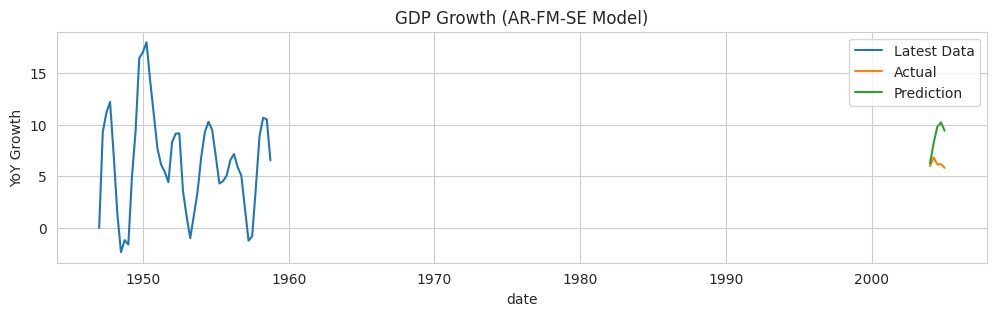

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

#### 4. Train 1959 - 1971 | Predict 1972-2003 | AR FM SE Model

In [ ]:
# Predict and Print RMSE Score
feat_59_71 = data_59_71.columns.tolist()
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_59_71
data_test = data_72_03
feat_59_71.remove('date')
rmse_score4, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_59_71, target = target, lag = lags, exog_val=val)
print(rmse_score4)

2.318023848412574


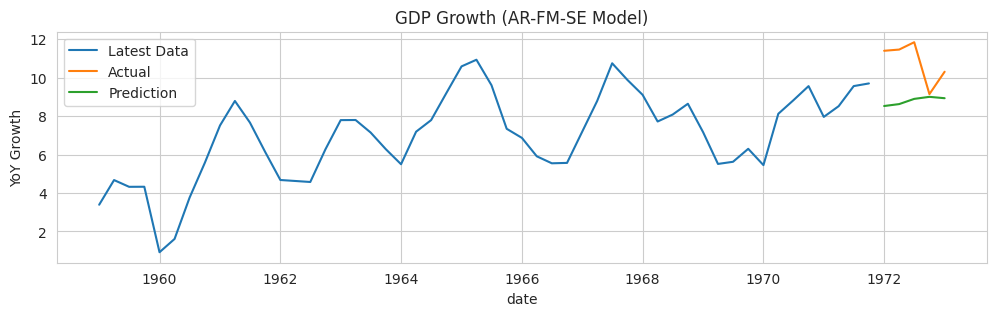

In [ ]:
 # visualize the prediction score
arfmse_visual(data_train, data_test, pred_df)

#### 5. Train 1959 - 1971 | Predict 2004 - 2024

In [ ]:
# Predict and Print RMSE Score
feat_59_71 = data_59_71.columns.tolist()
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_59_71
data_test = data_04_24
feat_59_71.remove('date')
rmse_score5, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_59_71, target = target, lag = lags, exog_val=val)
print(rmse_score5)

2.626111219675089


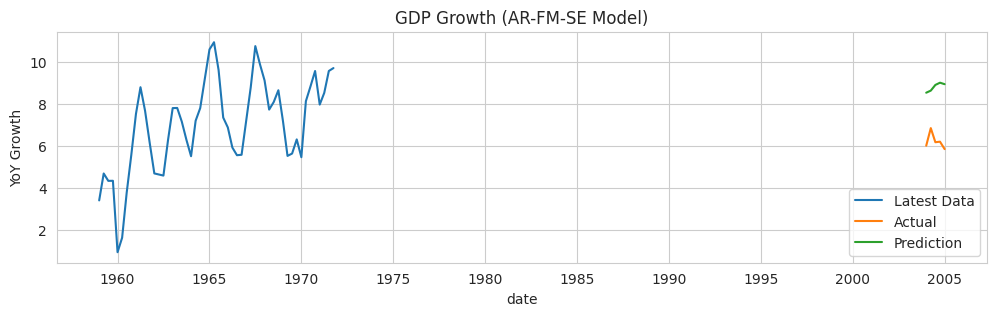

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

#### 6. Train 1971 - 2003 | Predict 2004 - 2024 | AR FM SE Model

In [ ]:
feat_72_03 = data_72_03.columns.tolist()
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_72_03
data_test = data_04_24
feat_72_03.remove('date')
rmse_score6, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_59_71, target = target, lag = lags, exog_val=val)
print(rmse_score6)

0.36580190620372394


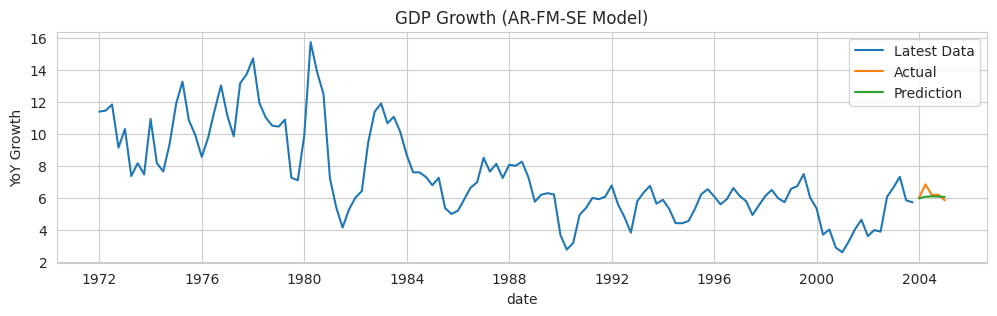

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

## Machine Learning Model

In [ ]:
# Create the visualization of Overall Prediction
def overall_pred_plot(pred_list, actual_data, target, model_name):
  plt.figure(figsize = (12,5))
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual', color = 'red')
  if len(pred_list) > 1:
    for pred in pred_list:
      sns.lineplot(data = pred, x = 'date', y = target, linestyle = ':')
  plt.ylabel('YoY Growth (%)')
  plt.title(f'GDP Growth Prediction ({model_name})')
  return plt.show()

# create certain periodic visualization
def predict_visual(actual_data, pred_data, target, error_score, model_name, year_data = None, predict_year = None):
  plt.figure(figsize = (12,5))
  sns.lineplot(data = actual_data.iloc[:len(pred_data)], x = 'date', y = target, label = 'Actual')
  sns.lineplot(data = pred_data, x = 'date', y = target, label = f'Prediction (RMSE: {error_score})')
  plt.legend()
  plt.ylabel('YoY Growth (%)', fontsize = 14)
  plt.title(f'{model_name} GDP Prediction (Data: {year_data})', fontsize = 16)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.xlabel('Date', fontsize = 14)
  plt.grid(True)
  plt.tight_layout()
  #plt.savefig(f'{model_name} data {year_data} to predict {predict_year}.png', dpi = 300)
  #files.download(f'{model_name} data {year_data} to predict {predict_year}.png')
  return plt.show()

### Linear Regression | fit_intercept: True, normalize: True, copy_X: True, n_jobs: -1

In [ ]:
# create linear algebra
from sklearn.linear_model import LinearRegression

def lin_reg(df_train, df_test, features):
  if 'yoy_gdp' in features:
    features.remove('yoy_gdp')
    features.remove('date')

  X_train = df_train[features]
  X_test = df_test[features]
  y_train = df_train['yoy_gdp']
  y_test = df_test['yoy_gdp']

  params = {'fit_intercept':True, 'copy_X':True, 'n_jobs':-1}
  model = LinearRegression(**params).fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
  pred_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':df_test.date.iloc[:len(y_pred)]})
  return rmse, pred_df

# create Visualization
def linalg_visual(actual_data, pred_data, target, error_score, model_name = None, year_data = None, predict_data = None):
  plt.figure(figsize=(12,5))
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual')
  sns.lineplot(data = pred_data, x = 'date', y = target, label = f'Prediction (RMSE {error_score})')
  plt.legend()
  plt.ylabel('YoY Growth (%)')
  plt.title(f'GDP Growth (Linear Regression Model) (Data: {year_data})')
  #plt.savefig(f'{model_name} data {year_data} to predict {predict_data}.png', dpi = 300)
  #files.download(f'{model_name} data {year_data} to predict {predict_data}.png')
  return plt.show()

#### 0. Train 1947 - 1958 | Predict 1947 - 1958 | Linear Regression

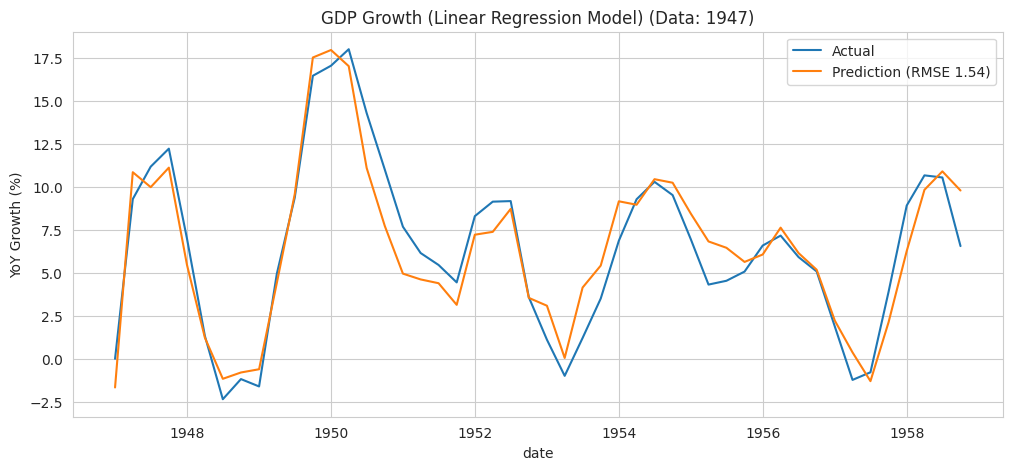

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_lin0, pred_lin0 = lin_reg(data_47_58, data_47_58, feats_47)
# visualize
linalg_visual(data_47_58, pred_lin0, 'yoy_gdp', rmse_lin0, 'Linear Regression', "1947", "1947")

#### 1. Train 1947 - 1958 | Predict 1959 - 1971 | Linear Regression

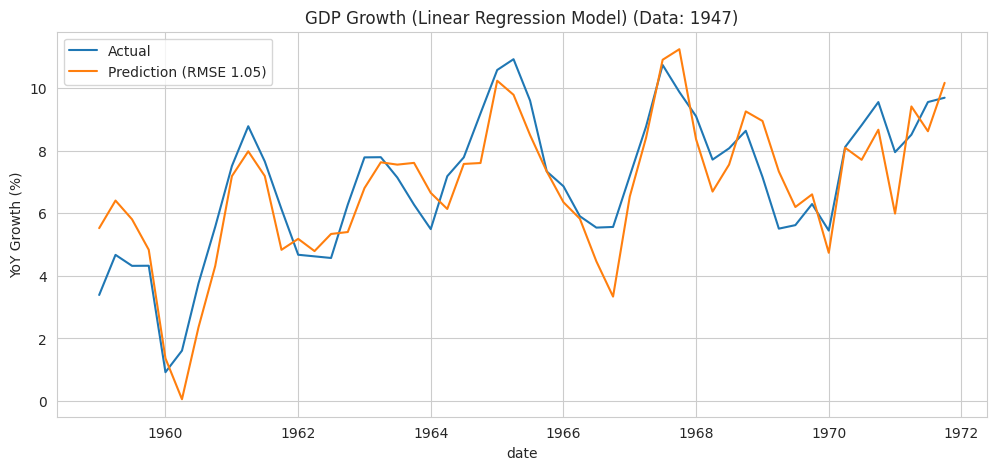

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_lin1, pred_lin1 = lin_reg(data_47_58, data_59_71, feats_47)
# visualize
linalg_visual(data_59_71, pred_lin1, 'yoy_gdp', rmse_lin1, 'Linear Regression', '1947', '1959')

#### 2. Train: 1947 - 1958 | Predict: 1972 - 2003 | Linear Regression

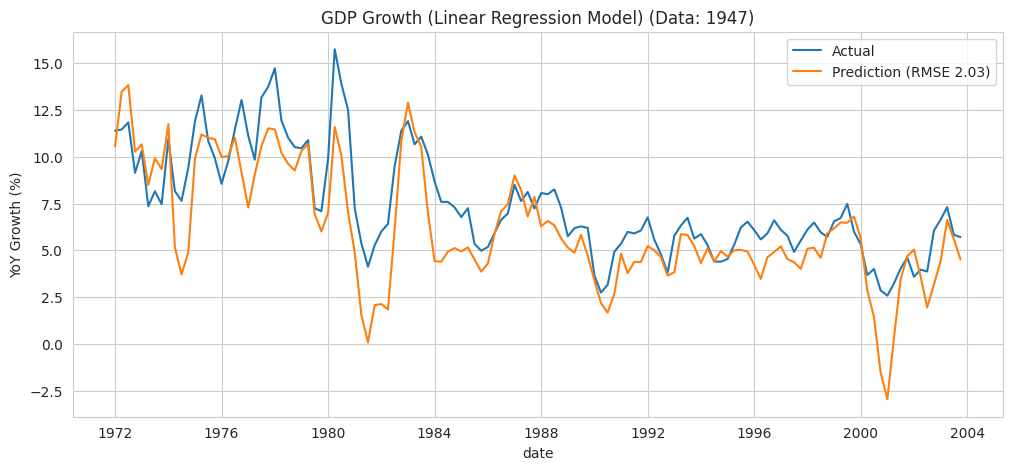

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_lin1, pred_lin2 = lin_reg(data_47_58, data_72_03, feats_47)
# visualize
linalg_visual(data_72_03, pred_lin2, 'yoy_gdp', rmse_lin1, 'Linear Regression', '1947', '1972')

#### 3. Train: 1947 - 1958 | Predict: 2004 - 2024 | Linear Regression

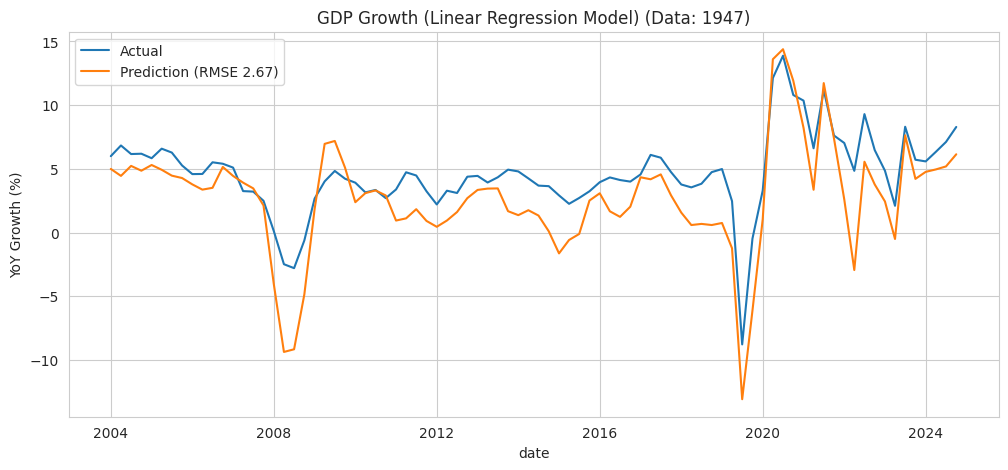

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_lin1, pred_lin3 = lin_reg(data_47_58, data_04_24, feats_47)
# visualize
linalg_visual(data_04_24, pred_lin3, 'yoy_gdp', rmse_lin1, 'Linear Regression', '1947', '2004')

#### 4. Train: 1959 - 1971 | Predict: 1972 - 2003 | Linear Regression

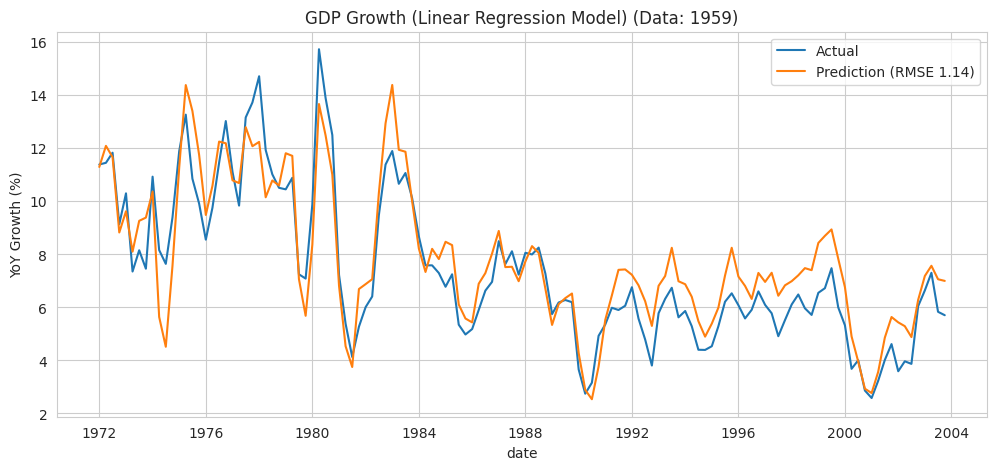

In [ ]:
feats_59 = data_59_71.columns.tolist()
rmse_lin4, pred_lin4 = lin_reg(data_59_71, data_72_03, feats_59)
# visualize
linalg_visual(data_72_03, pred_lin4, 'yoy_gdp', rmse_lin4, "Linear Regression", "1959", "1972")

#### 5. Train: 1959 - 1971 | Predict: 2004 - 2024 | Linear Regeression

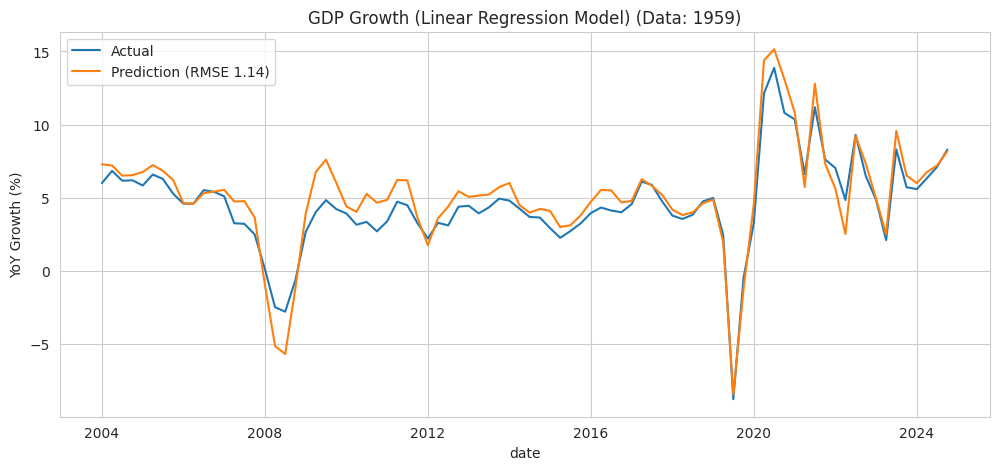

In [ ]:
feats_59 = data_59_71.columns.tolist()
rmse_lin5, pred_lin5 = lin_reg(data_59_71, data_04_24, feats_59)
# visualize
linalg_visual(data_04_24, pred_lin5, 'yoy_gdp', rmse_lin5, "Linear Regression", "1959", "2004")

#### 6. Train: 1972 - 2003 | Predict: 2004 - 2024 | Linear Regression

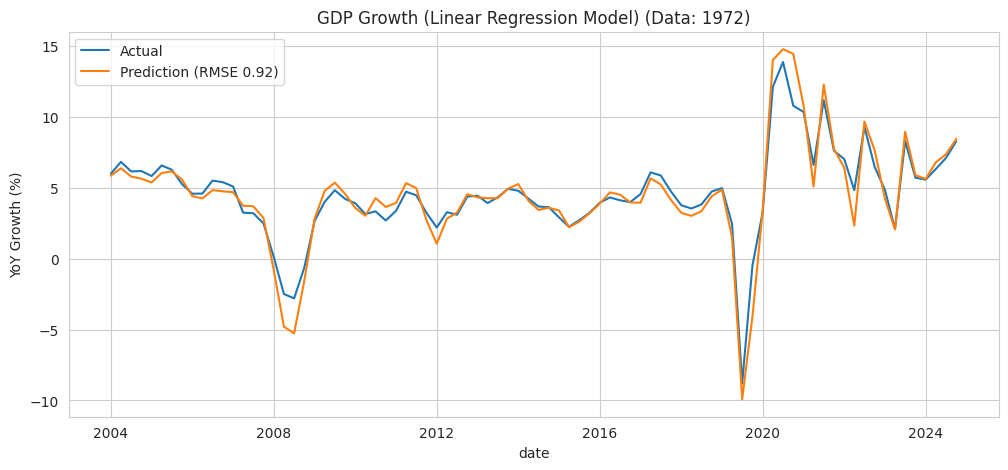

In [ ]:
feats_72 = data_72_03.columns.tolist()
rmse_lin6, pred_lin6 = lin_reg(data_72_03, data_04_24, feats_72)
# visualize
linalg_visual (data_04_24, pred_lin6, 'yoy_gdp', rmse_lin6, 'Linear Regression', '1972', " 2004")

#### Overall visual Linear Regression Prediction Plot

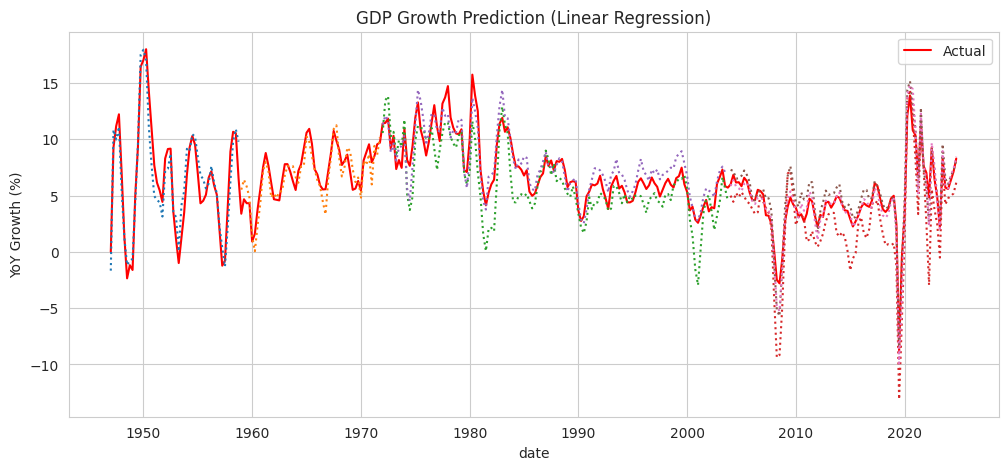

In [ ]:
pred_linreg = [pred_lin0, pred_lin1, pred_lin2, pred_lin3, pred_lin4, pred_lin5, pred_lin6]
overall_pred_plot(pred_linreg, data_47_24, 'yoy_gdp', 'Linear Regression')

In [ ]:
import pickle
from sklearn.linear_model import LinearRegression

# Define the parameters for the Linear Regression model
params = {'fit_intercept':True, 'copy_X':True, 'n_jobs':-1}

# Define features excluding 'date' and 'yoy_gdp' for training
feats_72_train = [col for col in data_72_03.columns if col not in ['date', 'yoy_gdp']]

# Train the model using data_72_03 for both features and target
linalg_model = LinearRegression(**params).fit(data_72_03[feats_72_train], data_72_03['yoy_gdp'])

# Save Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(linalg_model, f)

#from google.colab import files

#files.download('linear_regression_model.pkl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Lasso Regression L1 | aplha: 0.1, random_state: 42

In [ ]:
from sklearn.linear_model import Lasso

# Create the function of Lasso Regression
def lasso_reg(df_train, df_test, features):
  if 'yoy_gdp' in features:
    features.remove('yoy_gdp')
    features.remove('date')

  X_train = df_train[features]
  X_test = df_test[features]
  y_train = df_train['yoy_gdp']
  y_test = df_test['yoy_gdp']

  params = {'alpha':0.1, 'random_state':42}
  model = Lasso(**params).fit(X_train, y_train)
  y_pred = model.predict(X_test)

  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
  pred_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':df_test.date.iloc[:len(y_pred)]})
  return rmse, pred_df

#### 0. Train: 1947 - 1958 | Predict: 1947 - 1958 | Lasso Regression (alpha: 0.1, random_state: 42)

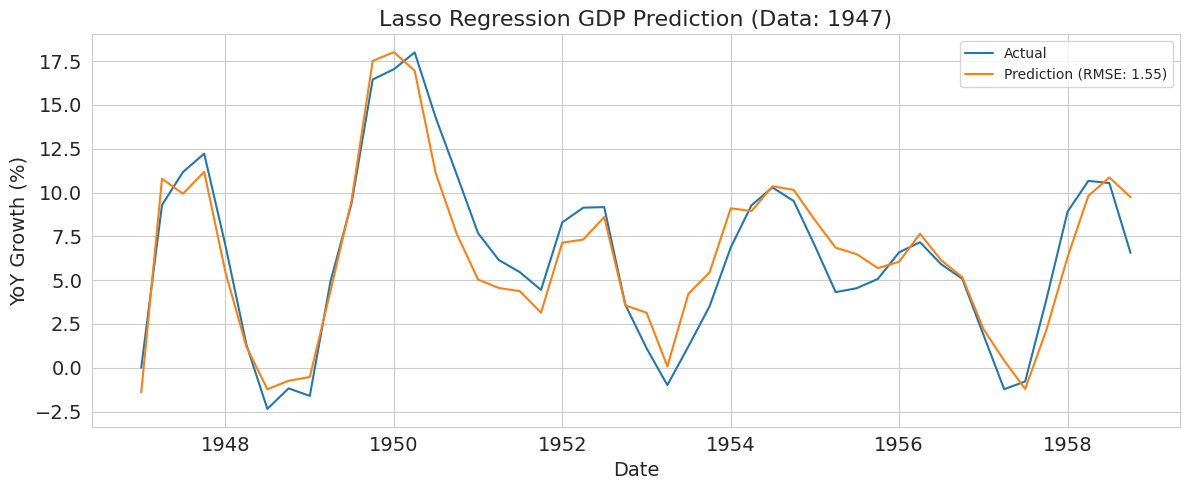

In [ ]:
# predict gdp and rmse
feats_47 = data_47_58.columns.tolist()
rmse_lasso0, pred_lasso0 = lasso_reg(data_47_58, data_47_58, feats_47)
# visualize
predict_visual(data_47_58, pred_lasso0, 'yoy_gdp', rmse_lasso0, 'Lasso Regression', '1947', '1947')

#### 1. Train: 1947 - 1958 | Predict: 1959 - 1971 | Lasso Regression (alpha: 0.1, random_state: 42)

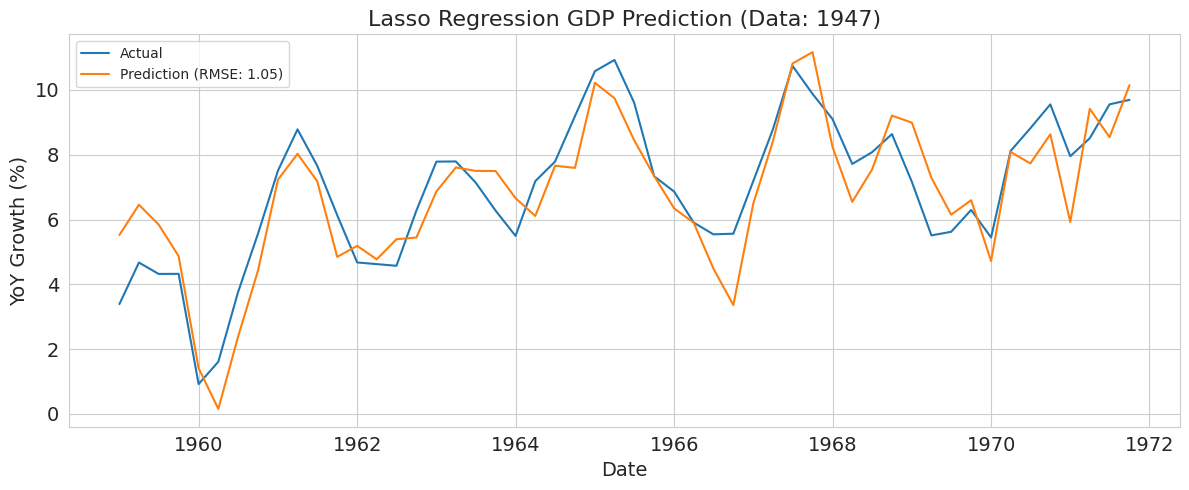

In [ ]:
# predict gdp and rmse
rmse_lasso1, pred_lasso1 = lasso_reg(data_47_58, data_59_71, feats_47)
# visualize
predict_visual(data_59_71, pred_lasso1, 'yoy_gdp', rmse_lasso1, 'Lasso Regression', '1947', '1959')

#### 2. Train: 1947 - 1958 | Predict: 1972 - 2003 | Lasso Regression (alpha: 0.1, random_state: 42)

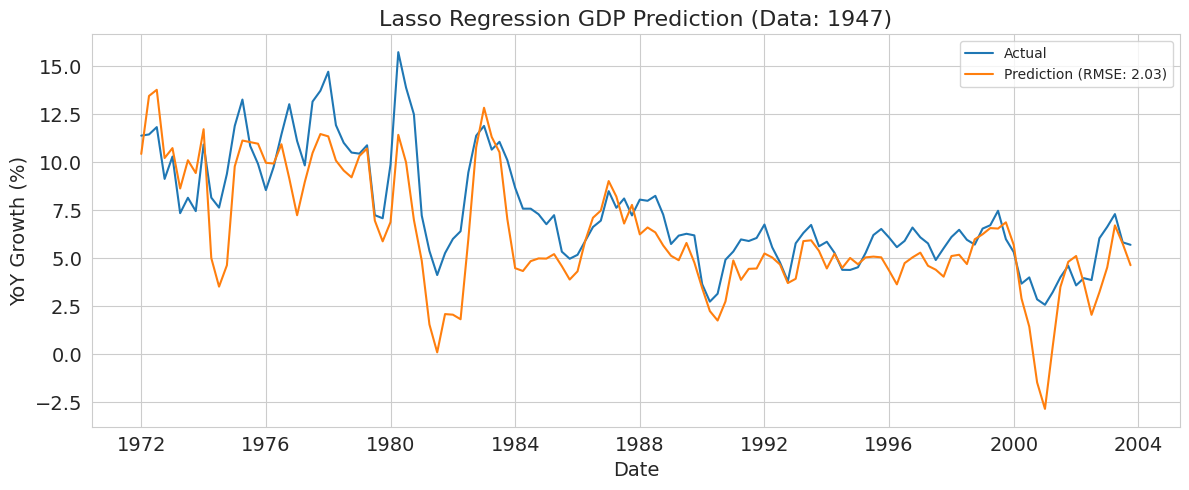

In [ ]:
# predict gdp and rmse
rmse_lasso2, pred_lasso2 = lasso_reg(data_47_58, data_72_03, feats_47)
# visualize
predict_visual(data_72_03, pred_lasso2, 'yoy_gdp', rmse_lasso2, 'Lasso Regression', '1947', '1972')

#### 3. Train: 1947 - 1958 | Predict: 2004 - 2024 | Lasso Regression (alpha: 0.1, random_state: 42)

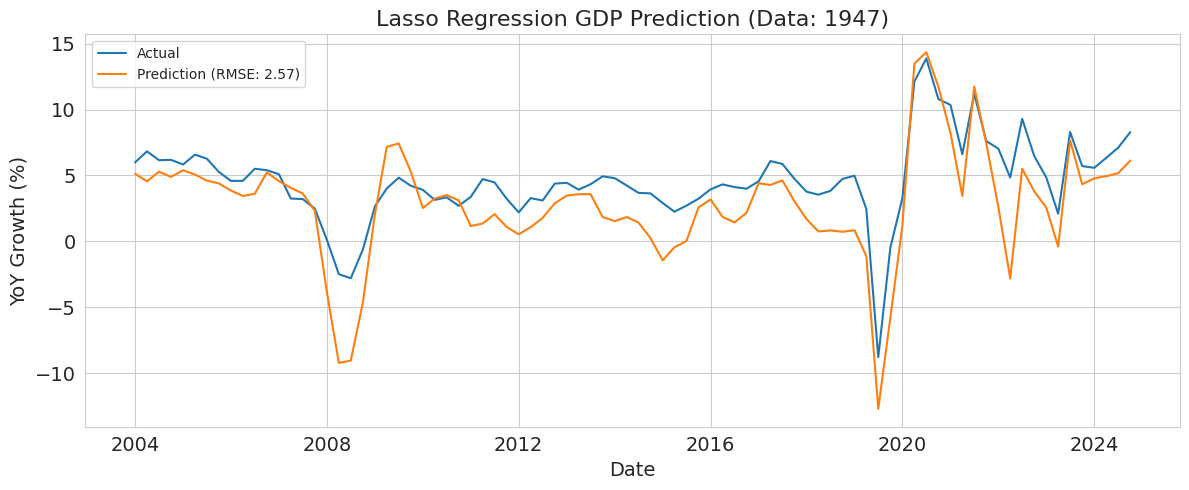

In [ ]:
# predict gdp and rmse
rmse_lasso3, pred_lasso3 = lasso_reg(data_47_58, data_04_24, feats_47)
# visualize
predict_visual(data_04_24, pred_lasso3, 'yoy_gdp', rmse_lasso3, 'Lasso Regression', '1947', '2004')

#### 4. Train: 1959 - 1971 | Predict: 1972 - 2003 | Lasso Regression (alpha: 0.1, random_state: 42)

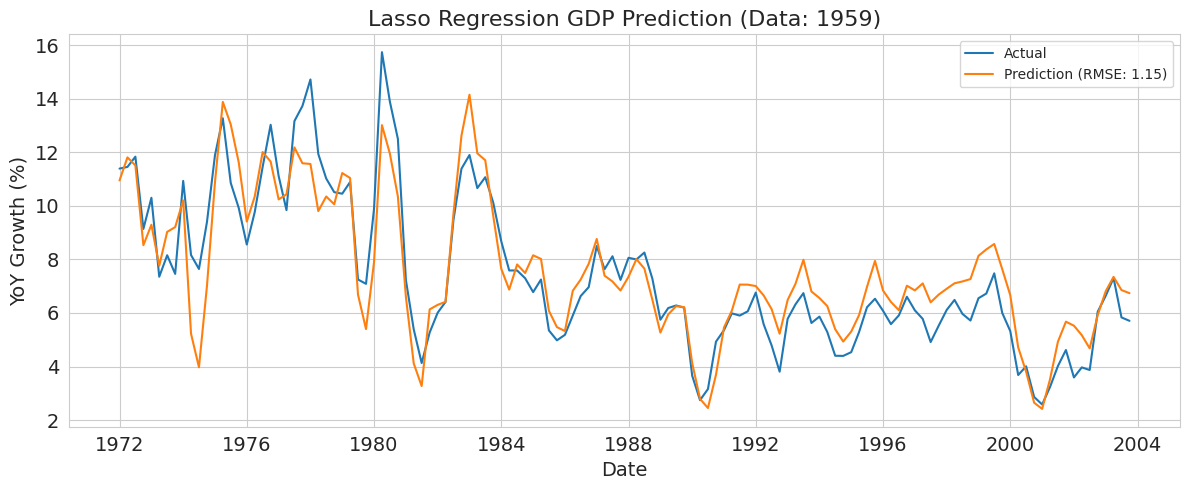

In [ ]:
feats_59  = data_59_71.columns.tolist()
rmse_lasso4, pred_lasso4 = lasso_reg(data_59_71, data_72_03, feats_59)
# visualize
predict_visual(data_72_03, pred_lasso4, 'yoy_gdp', rmse_lasso4, 'Lasso Regression', '1959', '1972')

#### 5. Train: 1959 - 1971 | Predict: 2004 - 2024 | Lasso Regression (alpha: 0.1, random_state: 42)

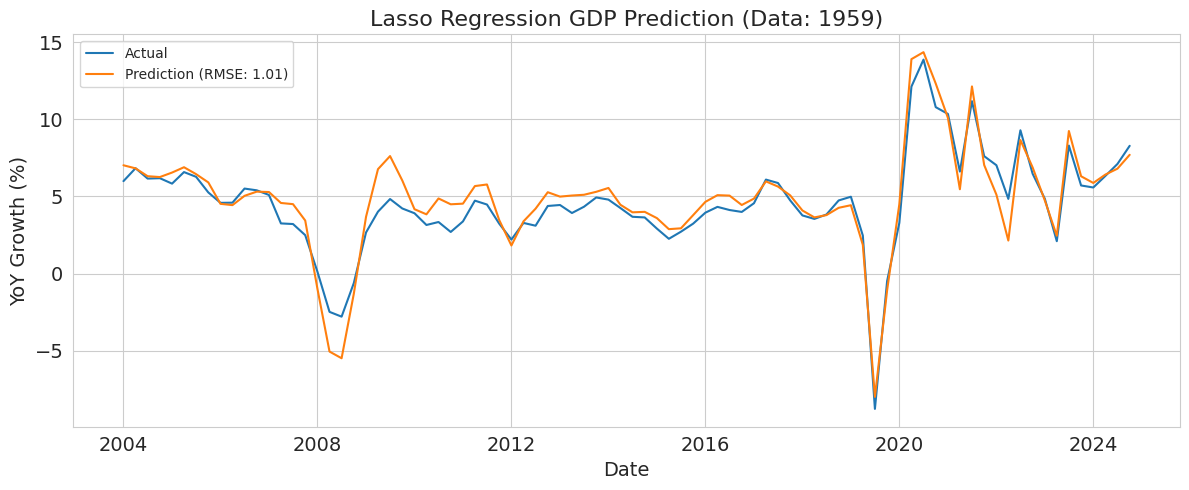

In [ ]:
feats_59  = data_59_71.columns.tolist()
rmse_lasso5, pred_lasso5 = lasso_reg(data_59_71, data_04_24, feats_59)
# visualize
predict_visual(data_04_24, pred_lasso5, 'yoy_gdp', rmse_lasso5, 'Lasso Regression', '1959', '2004')

#### 6. Train: 1972 - 2003 | Predict: 2004 - 2024 | Lasso Regression (alpha: 0.1, random_state: 42)

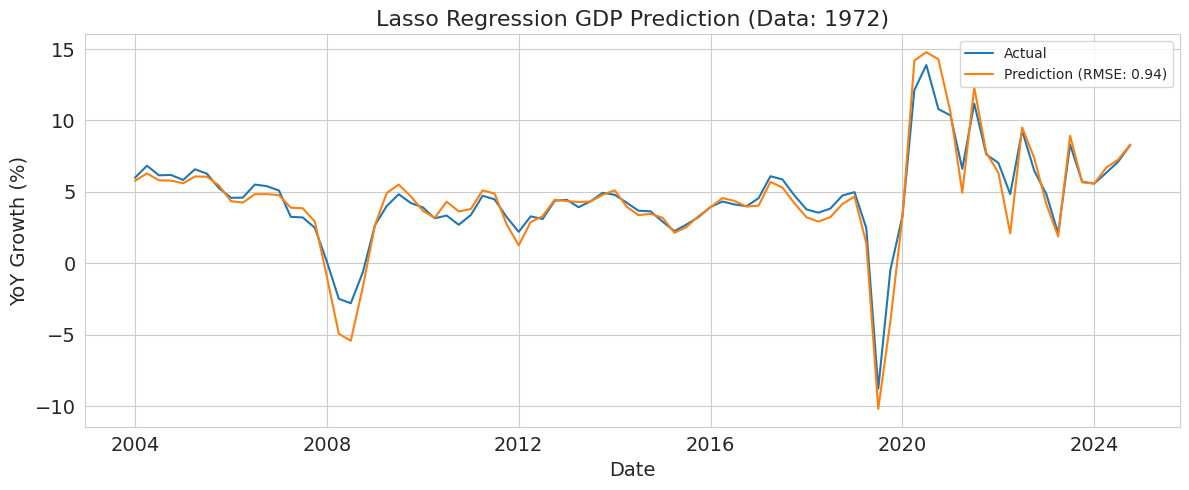

In [ ]:
feats_72  = data_72_03.columns.tolist()
rmse_lasso6, pred_lasso6 = lasso_reg(data_72_03, data_04_24, feats_72)
# visualize
predict_visual(data_04_24, pred_lasso6, 'yoy_gdp', rmse_lasso6, 'Lasso Regression', '1972', '2004')

#### (Bonus). Train: 2004 - 2024 | Predict: 2004 - 2024 | Lasso Regression (alpha: 0.1, random_state: 42)

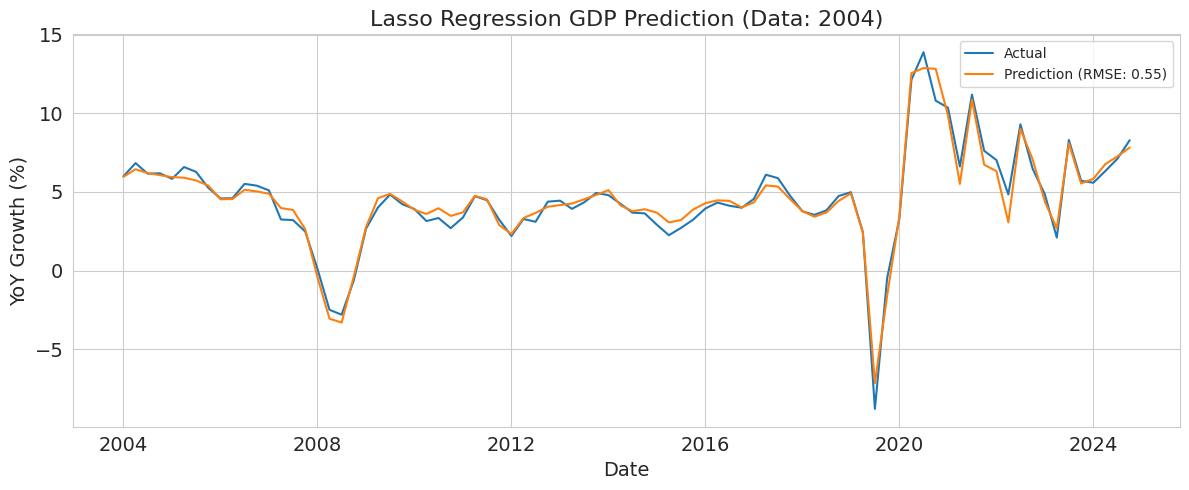

In [ ]:
feats_04 = data_04_24.columns.tolist()
rmse_lasso7, pred_lasso7 = lasso_reg(data_04_24, data_04_24, feats_04)
# visualize
predict_visual(data_04_24, pred_lasso7, 'yoy_gdp', rmse_lasso7, 'Lasso Regression', '2004')

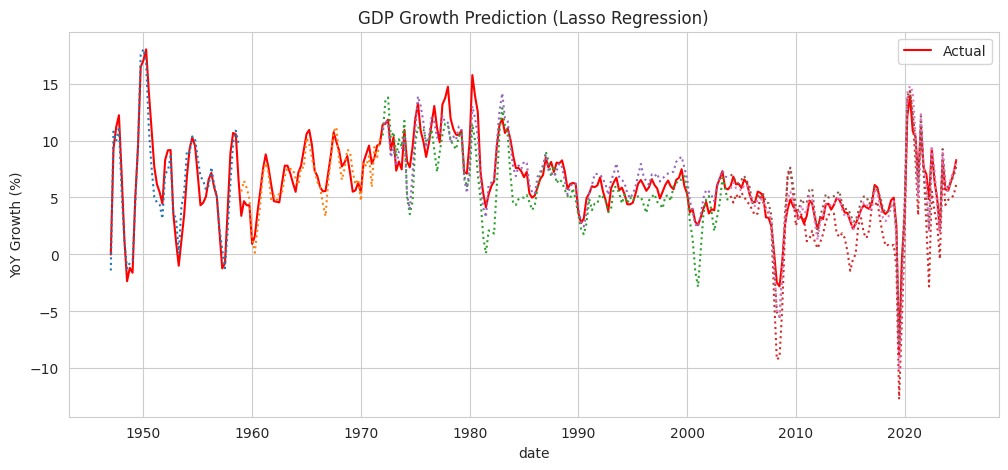

In [ ]:
# overall visual
pred_lasso = [pred_lasso0, pred_lasso1, pred_lasso2, pred_lasso3, pred_lasso4, pred_lasso5, pred_lasso6]
overall_pred_plot(pred_lasso, data_47_24, 'yoy_gdp', 'Lasso Regression')

### XGBoost | No Hyperparameter Tuning

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Create a Function of XGB model
def xgb_mod(df_train, df_test, features):
  if 'yoy_gdp' in features:
    features.remove('yoy_gdp')
    features.remove('date')

  X_train = df_train[features]
  X_test = df_test[features]
  y_train = df_train['yoy_gdp']
  y_test = df_test['yoy_gdp']

  dtrain = xgb.DMatrix(X_train, label = y_train)
  dtest = xgb.DMatrix(X_test, label = y_test)
  params = {
      'objective': 'reg:squarederror',
      'eval_metric': 'rmse',
      'eta': 0.1,
      'max_depth': 3
  }
  num_rounds = 100
  model = xgb.train(params, dtrain, num_rounds)
  y_pred = model.predict(dtest)
  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
  pred_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':df_test.date.iloc[:len(y_pred)]})
  return rmse, pred_df

In [ ]:
# Visualize the result
def visual_xgb (actual_data, pred_data, target, error_score):
  plt.figure(figsize=(12,5))
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual')
  sns.lineplot(data = pred_data, x = 'date', y = target, label = f'Prediction (RMSE {error_score})')
  plt.legend()
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (XGBoost Model)')
  return plt.show()

#### 0. Train: 1947-1958 | Predict: 1947-1958 | XGBoost (eta: 0.1, max_depth: 3)

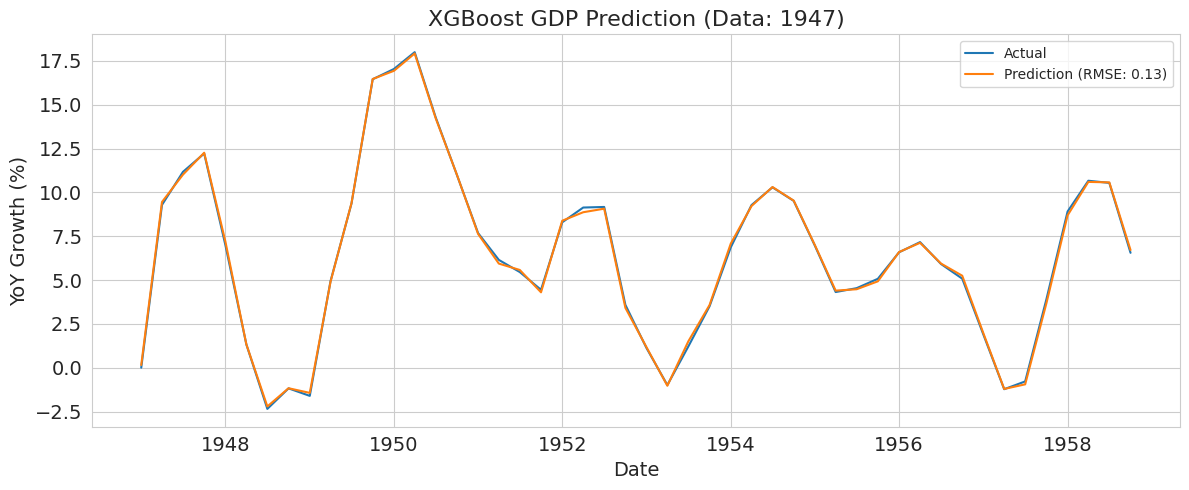

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_xgb0, pred_xgb0 = xgb_mod(data_47_58, data_47_58, feats_47)
# visualize
predict_visual(data_47_58, pred_xgb0, 'yoy_gdp', rmse_xgb0, 'XGBoost', '1947', '1947')

#### 1. Train: 1947-1958 | Test: 1959-1971 | XGBoost (eta: 0.1, max_depth: 3)

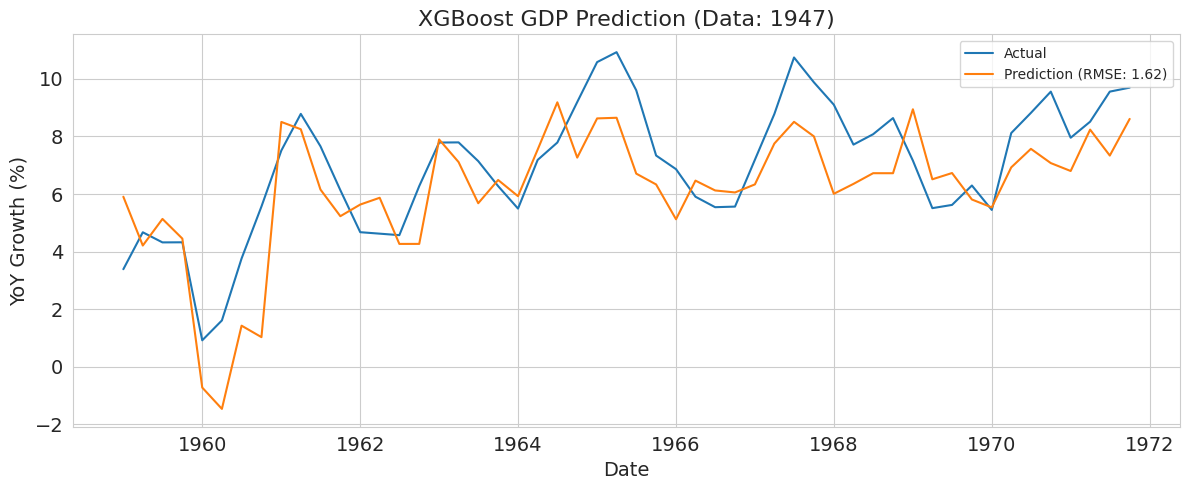

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_xgb1, pred_xgb1 = xgb_mod(data_47_58, data_59_71, feats_47)
# visualize
predict_visual(data_59_71, pred_xgb1, 'yoy_gdp', rmse_xgb1, 'XGBoost', '1947', '1959')

#### 2. Train: 1947 - 1958 | Predict: 1972 - 2003 | XGBoost (eta: 0.1, max_depth: 3)

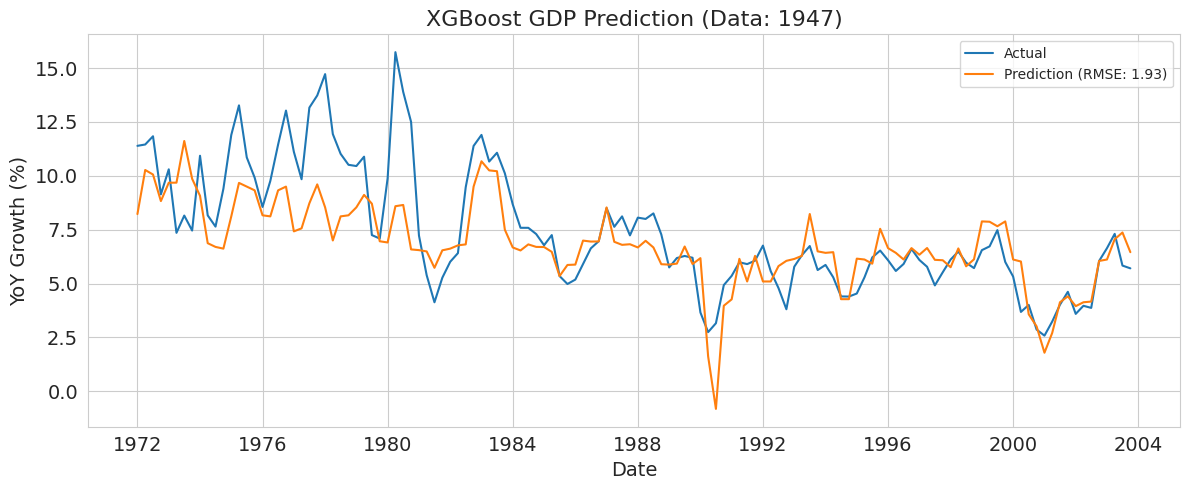

In [ ]:
rmse_xgb2, pred_xgb2 = xgb_mod(data_47_58, data_72_03, feats_47)
# visualize
predict_visual(data_72_03, pred_xgb2, 'yoy_gdp', rmse_xgb2, 'XGBoost', '1947', '1972')

#### 3. Train: 1947 - 1958 | Predict: 2004 - 2024 | XGBoost (eta: 0.1, max_depth: 3)

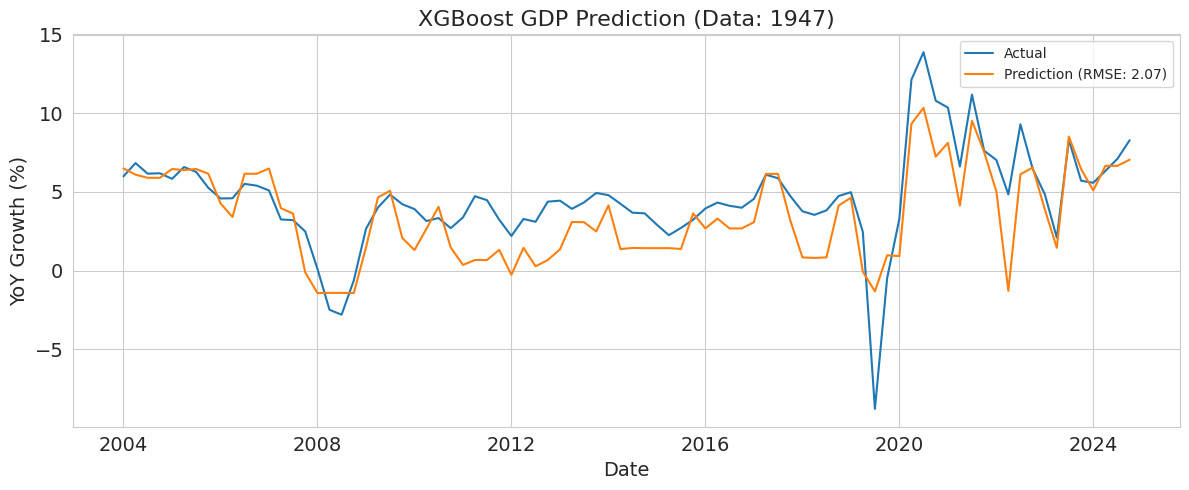

In [ ]:
rmse_xgb3, pred_xgb3 = xgb_mod(data_47_58, data_04_24, feats_47)
# visualize
predict_visual(data_04_24, pred_xgb3, 'yoy_gdp', rmse_xgb3, 'XGBoost', '1947', '2004')

#### 4. Train: 1959 - 1971 | Predict: 1972 - 2003 | XGBoost (eta: 0.1, max_depth: 3)

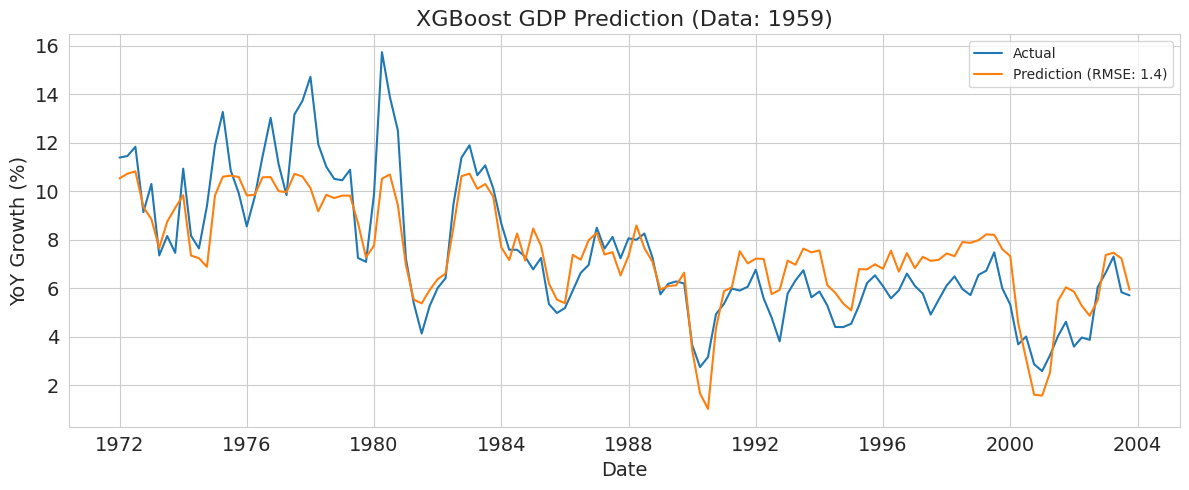

In [ ]:
feats_59 = data_59_71.columns.tolist()
rmse_xgb4, pred_xgb4 = xgb_mod(data_59_71, data_72_03, feats_59)
# visualize
predict_visual(data_72_03, pred_xgb4, 'yoy_gdp', rmse_xgb4, 'XGBoost', '1959', '1972')

#### 5. Train: 1959 - 1971 | Predict: 2004 - 2024 | XGBoost (eta: 0.1, max_depth: 3)

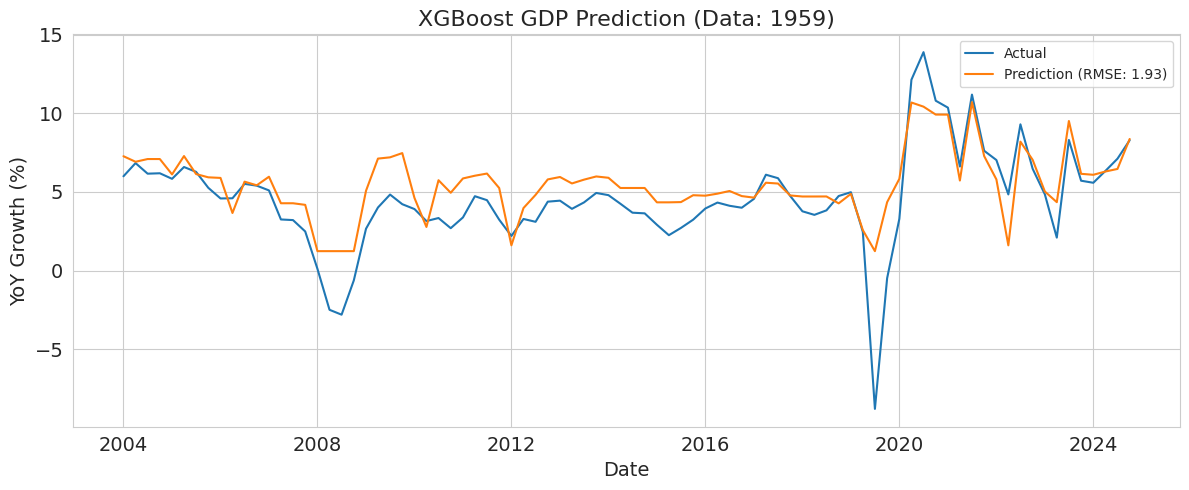

In [ ]:
rmse_xgb5, pred_xgb5 = xgb_mod(data_59_71, data_04_24, feats_59)
# visualize
predict_visual(data_04_24, pred_xgb5, 'yoy_gdp', rmse_xgb5, 'XGBoost', '1959', '2004')

#### 6. Train: 1972 - 2003 | Predict: 2004 - 2024 | XGBoost (eta: 0.1, max_depth: 3)

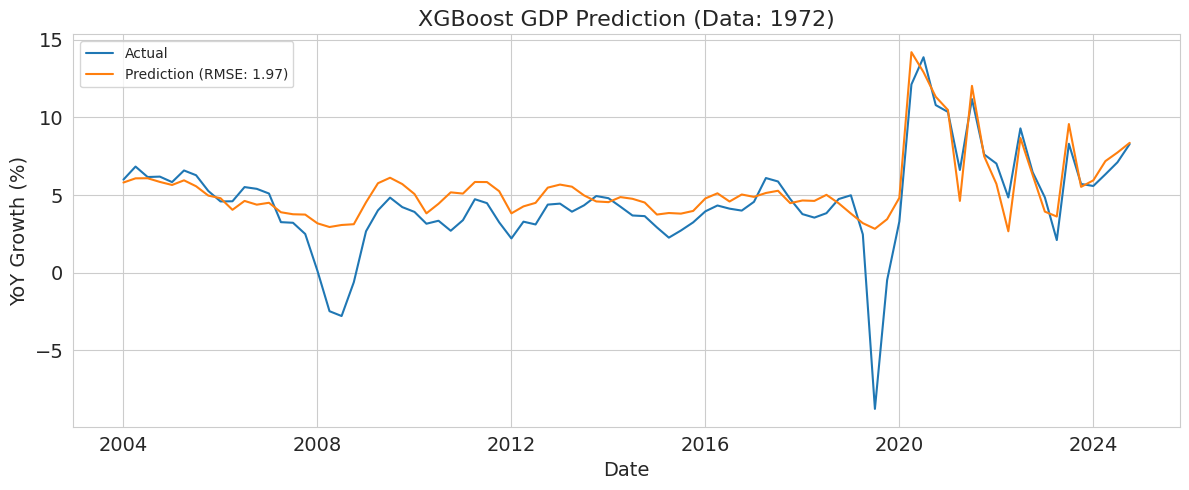

In [ ]:
feats_72 = data_72_03.columns.tolist()
rmse_xgb6, pred_xgb6 = xgb_mod(data_72_03, data_04_24, feats_72)
# visualize
predict_visual(data_04_24, pred_xgb6, 'yoy_gdp', rmse_xgb6, 'XGBoost', '1972', '2004')

#### Visualize XGBoost Prediction Plot

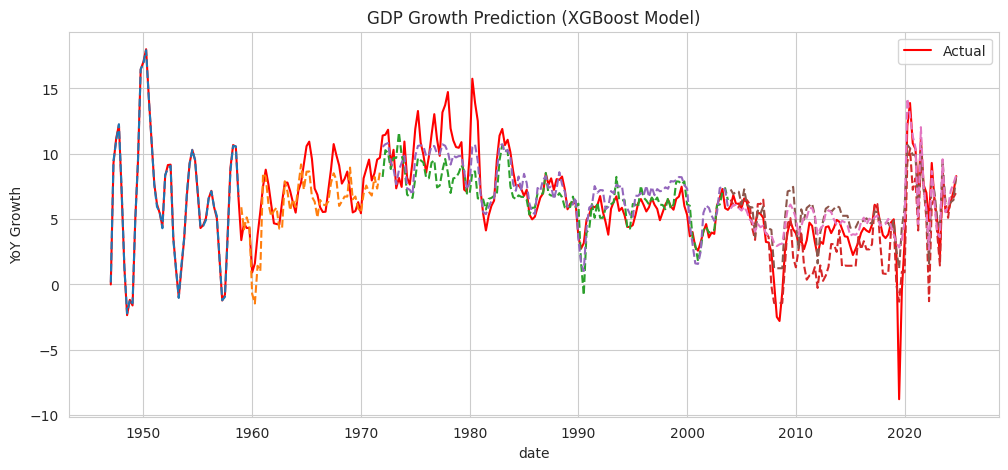

In [ ]:
# Visualize all Prediction and Actual Value of yoy_gdp
pred_xgb = [pred_xgb0, pred_xgb1, pred_xgb2, pred_xgb3, pred_xgb4, pred_xgb5, pred_xgb6]
def visual_pred_xgb(pred_list, actual_data, target):
  plt.figure(figsize = (12,5))
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual', color = 'red')
  if len(pred_list) > 1:
    for pred in pred_list:
      sns.lineplot(data = pred, x = 'date', y = target, linestyle = '--')
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth Prediction (XGBoost Model)')
  return plt.show()
visual_pred_xgb(pred_xgb, data_47_24, 'yoy_gdp')

### Elastic Net Regression

In [ ]:
# import all regression
from sklearn.linear_model import ElasticNet
def elastic_net(df_train, df_test, features):
  if 'yoy_gdp' in features:
    features.remove('yoy_gdp')
    features.remove('date')

  X_train = df_train[features]
  X_test = df_test[features]
  y_train = df_train['yoy_gdp']
  y_test = df_test['yoy_gdp']

  params = {'alpha':0.1, 'l1_ratio':0.5, 'random_state':42}
  model = ElasticNet(**params).fit(X_train, y_train)
  y_pred = model.predict(X_test)

  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
  pred_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':df_test.date.iloc[:len(y_pred)]})
  return rmse, pred_df

#### 0. Train: 1947-1958 | Predict: 1947-1958 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

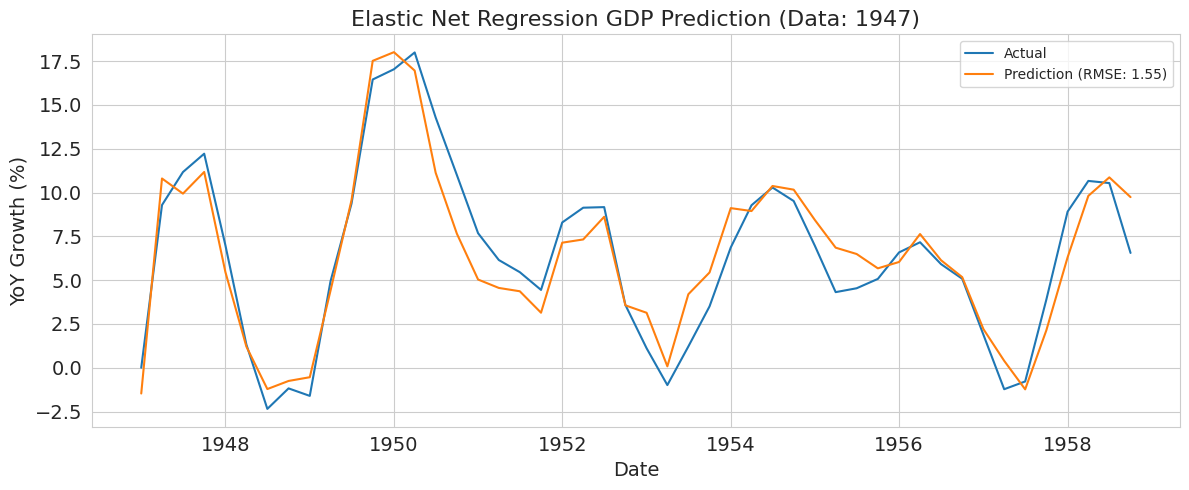

In [ ]:
rmse_en0, pred_en0 = elastic_net(data_47_58, data_47_58, feats_47)
#visualize
predict_visual(data_47_58, pred_en0, 'yoy_gdp', rmse_en0, 'Elastic Net Regression', '1947', '1947')

#### 1. Train: 1947-1958 | Predict: 1959-1971 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

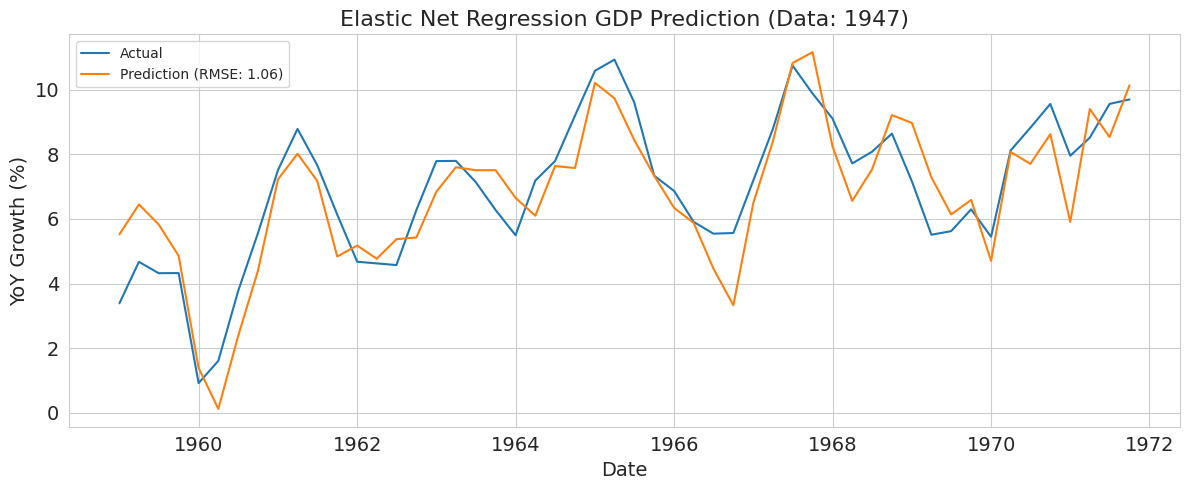

In [ ]:
rmse_en1, pred_en1 = elastic_net(data_47_58, data_59_71, feats_47)
# visualize
predict_visual(data_59_71, pred_en1, 'yoy_gdp', rmse_en1, 'Elastic Net Regression', '1947', '1959')

#### 2. Train: 1947-1958 | Predict: 1972-2003 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

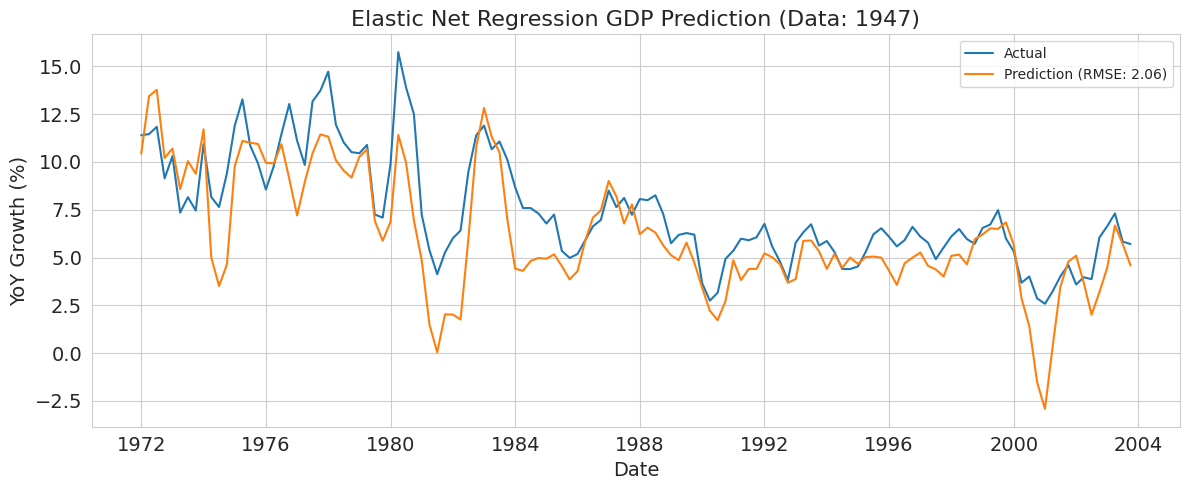

In [ ]:
rmse_en2, pred_en2 = elastic_net(data_47_58, data_72_03, feats_47)
# visualize
predict_visual(data_72_03, pred_en2, 'yoy_gdp', rmse_en2, 'Elastic Net Regression', '1947', '1972')

#### 3. Train: 1947-1958 | Predict: 2004-2024 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

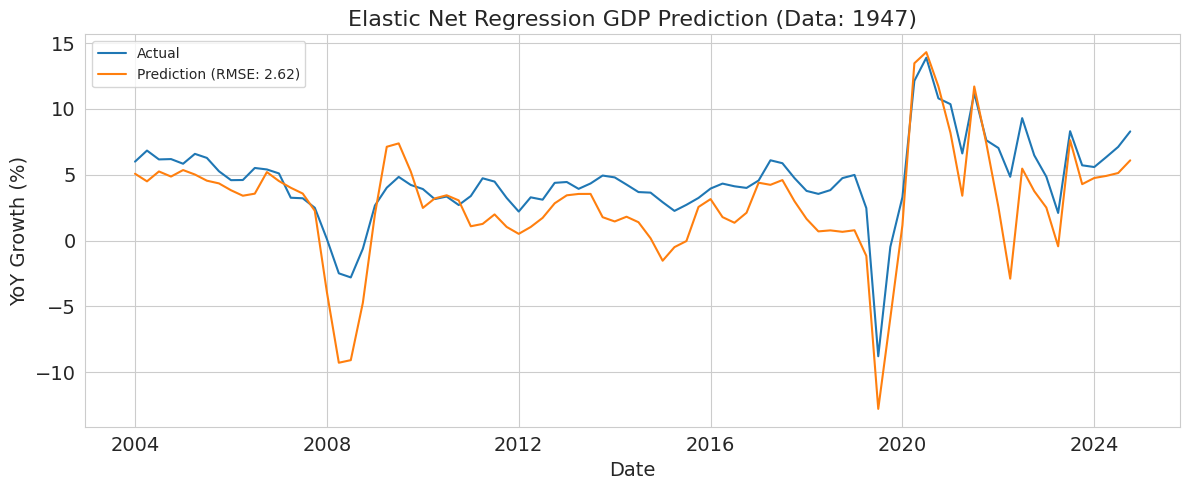

In [ ]:
rmse_en3, pred_en3 = elastic_net(data_47_58, data_04_24, feats_47)
# visualize
predict_visual(data_04_24, pred_en3, 'yoy_gdp', rmse_en3, 'Elastic Net Regression', '1947', '2004')

#### 4. Train: 1959-1971 | Predict: 1972-2003 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

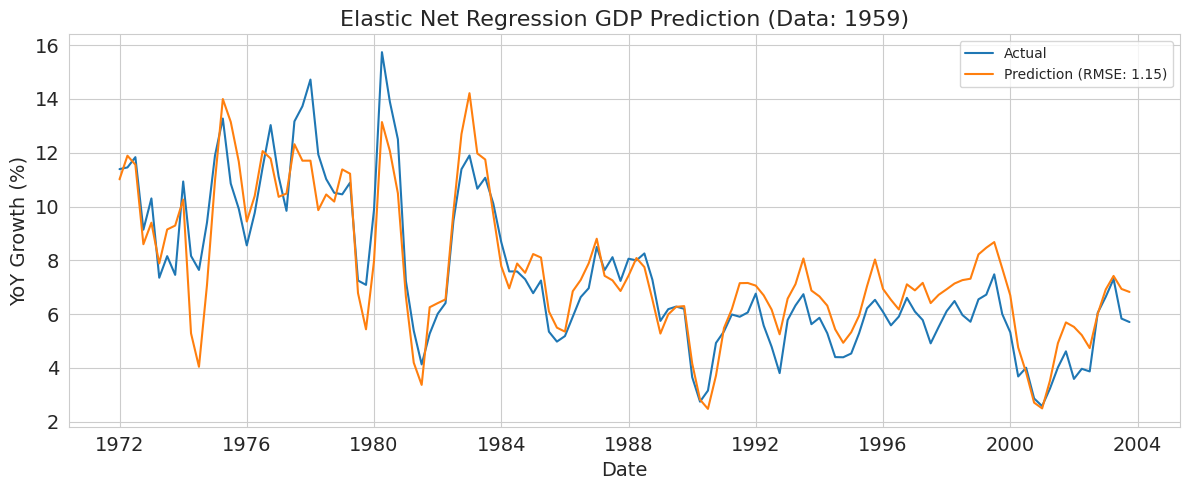

In [ ]:
rmse_en4, pred_en4 = elastic_net(data_59_71, data_72_03, feats_59)
# visualize
predict_visual(data_72_03, pred_en4, 'yoy_gdp', rmse_en4, 'Elastic Net Regression', '1959', '1972')

#### 5. Train: 1959-1971 | Predict: 2004-2024 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

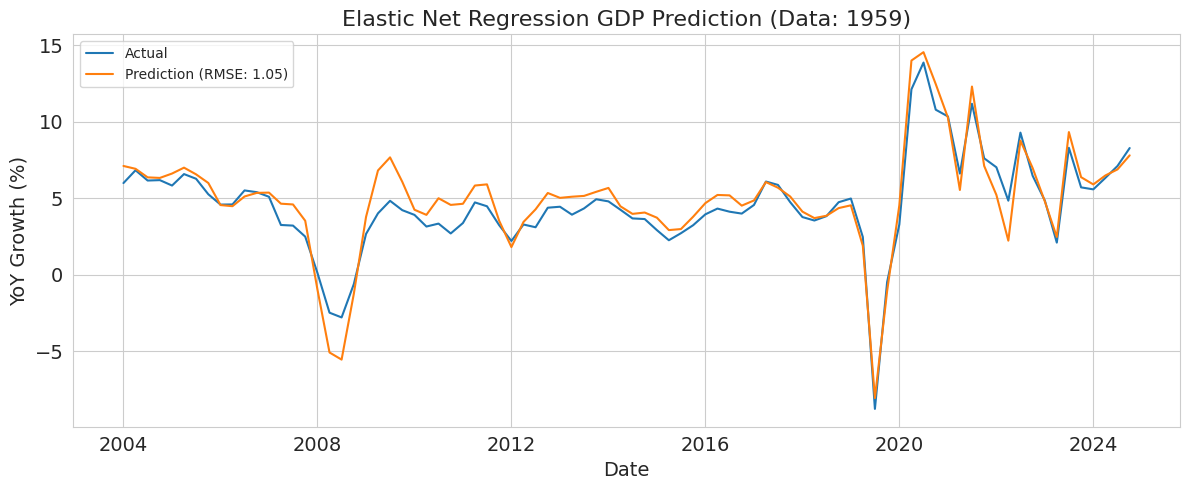

In [ ]:
rmse_en5, pred_en5 = elastic_net(data_59_71, data_04_24, feats_59)
# visualize
predict_visual(data_04_24, pred_en5, 'yoy_gdp', rmse_en5, 'Elastic Net Regression', '1959', '2004')

#### 6. Train: 1972-2003 | Predict: 2004-2024 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

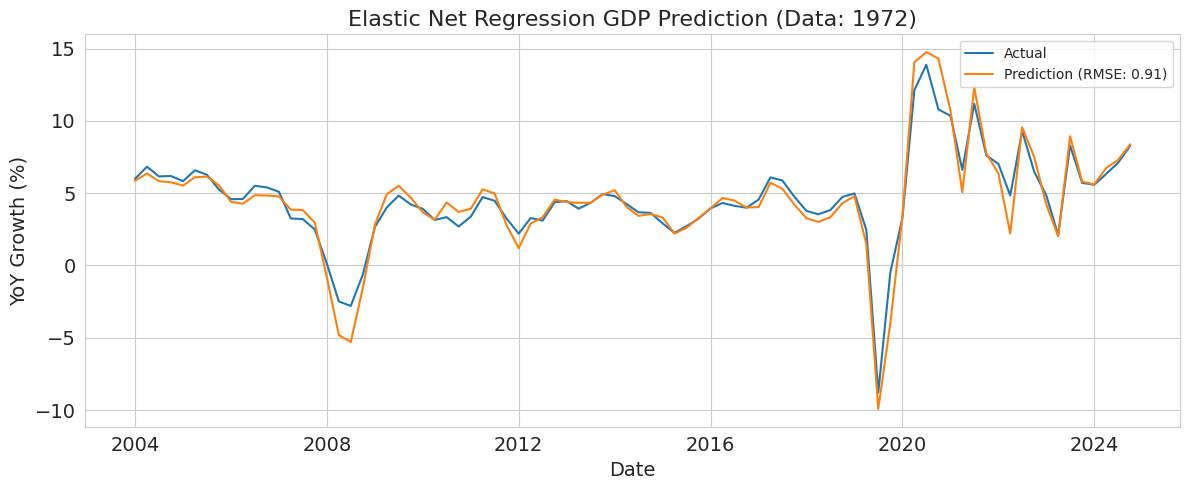

In [ ]:
rmse_en6, pred_en6 = elastic_net(data_72_03, data_04_24, feats_72)
# visualize
predict_visual(data_04_24, pred_en6, 'yoy_gdp', rmse_en6, 'Elastic Net Regression', '1972', '2004')

#### A. Train: 2004-2024 | Predict: 2004-2024 | Elastic Net (alpha:0.1, l1_ratio:0.5, random_state: 42)

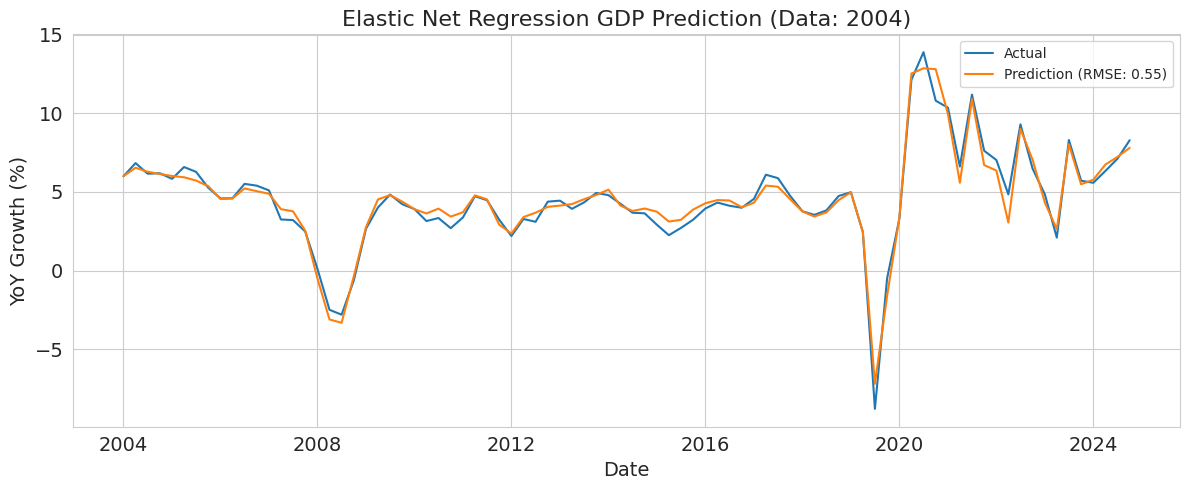

In [ ]:
rmse_enA, pred_enA = elastic_net(data_04_24, data_04_24, feats_04)
# visualize
predict_visual(data_04_24, pred_enA, 'yoy_gdp', rmse_enA, 'Elastic Net Regression', '2004', '2004')